# Node classification - syn world dataset

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [23]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [24]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":20, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [25]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_1expe.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_syn_topk_1expe.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [26]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [27]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [28]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [29]:
df_res = df_res.reset_index()
df_res

dataset  true_label_as_target  hard_mask   topk      explainer_name  \
0       syn1                 False      False    1.0  basic_gnnexplainer   
1       syn1                 False      False    1.0            distance   
2       syn1                 False      False    1.0                  ig   
3       syn1                 False      False    1.0           occlusion   
4       syn1                 False      False    1.0            pagerank   
...      ...                   ...        ...    ...                 ...   
1595    syn6                  True       True  100.0         pgexplainer   
1596    syn6                  True       True  100.0        pgmexplainer   
1597    syn6                  True       True  100.0              random   
1598    syn6                  True       True  100.0                  sa   
1599    syn6                  True       True  100.0           subgraphx   

      num_test  fidelity_acc+  fidelity_acc-  fidelity_prob+  fidelity_prob-  \
0        100.0          -1.00          -1.00       -1.000000       -1.000000   
1        100.0          -1.00          -1.00       -1.000000       -1.000000   
2        100.0          -1.00          -1.00       -1.000000       -1.000000   
3        100.0          -1.00          -1.00       -1.000000       -1.000000   
4        100.0          -1.00          -1.00       -1.000000       -1.000000   
...        ...            ...            ...             ...             ...   
1595     100.0           0.24           0.43        0.186025        0.388927   
1596     100.0           0.67           0.06        0.547282        0.060046   
1597     100.0           0.19           0.65        0.138319        0.545766   
1598     100.0           0.56           0.65        0.384663        0.577091   
1599     100.0           0.63           0.26        0.515199        0.244220   

      ...  number_of_edges         type  1-fidelity_acc-  1-fidelity_prob-  \
0     ...           4110.0  pertubation             2.00          2.000000   
1     ...           4110.0     baseline             2.00          2.000000   
2     ...           4110.0     gradient             2.00          2.000000   
3     ...           4110.0  pertubation             2.00          2.000000   
4     ...           4110.0     baseline             2.00          2.000000   
...   ...              ...          ...              ...               ...   
1595  ...           3948.0  pertubation             0.57          0.611073   
1596  ...           3948.0  pertubation             0.94          0.939954   
1597  ...           3948.0     baseline             0.35          0.454234   
1598  ...           3948.0     gradient             0.35          0.422909   
1599  ...           3948.0  pertubation             0.74          0.755780   

      charact_prob  charact_acc  1-fidelity_gnn_acc-  1-fidelity_gnn_prob-  \
0        -4.000000    -4.000000                 0.32              0.438530   
1        -4.000000    -4.000000                 0.32              0.442950   
2        -4.000000    -4.000000                 0.32              0.426547   
3        -4.000000    -4.000000                 0.32              0.446576   
4        -4.000000    -4.000000                 0.32              0.412311   
...            ...          ...                  ...                   ...   
1595      0.285221     0.337778                 2.00              2.000000   
1596      0.691780     0.782360                 2.00              2.000000   
1597      0.212063     0.246296                 2.00              2.000000   
1598      0.402880     0.430769                 2.00              2.000000   
1599      0.612720     0.680584                 2.00              2.000000   

      charact_gnn_prob  charact_gnn_acc  
0             0.070559         0.101053  
1             0.162402         0.230400  
2             0.236891         0.238431  
3             0.402944         0.374026  
4             0.297901         0.343188  
...  

In [30]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]


In [31]:
df_res

dataset  true_label_as_target  hard_mask   topk      explainer_name  \
0       syn1                 False      False    1.0  basic_gnnexplainer   
1       syn1                 False      False    1.0            distance   
2       syn1                 False      False    1.0                  ig   
3       syn1                 False      False    1.0           occlusion   
4       syn1                 False      False    1.0            pagerank   
...      ...                   ...        ...    ...                 ...   
1595    syn6                  True       True  100.0         pgexplainer   
1596    syn6                  True       True  100.0        pgmexplainer   
1597    syn6                  True       True  100.0              random   
1598    syn6                  True       True  100.0                  sa   
1599    syn6                  True       True  100.0           subgraphx   

      num_test  fidelity_acc+  fidelity_acc-  fidelity_prob+  fidelity_prob-  \
0        100.0           0.06          -1.00        0.038366       -1.000000   
1        100.0           0.18          -1.00        0.099428       -1.000000   
2        100.0           0.19          -1.00        0.163980       -1.000000   
3        100.0           0.45          -1.00        0.367080       -1.000000   
4        100.0           0.37          -1.00        0.233193       -1.000000   
...        ...            ...            ...             ...             ...   
1595     100.0           0.24           0.43        0.186025        0.388927   
1596     100.0           0.67           0.06        0.547282        0.060046   
1597     100.0           0.19           0.65        0.138319        0.545766   
1598     100.0           0.56           0.65        0.384663        0.577091   
1599     100.0           0.63           0.26        0.515199        0.244220   

      ...  number_of_edges         type  1-fidelity_acc-  1-fidelity_prob-  \
0     ...           4110.0  pertubation             0.32          0.438530   
1     ...           4110.0     baseline             0.32          0.442950   
2     ...           4110.0     gradient             0.32          0.426547   
3     ...           4110.0  pertubation             0.32          0.446576   
4     ...           4110.0     baseline             0.32          0.412311   
...   ...              ...          ...              ...               ...   
1595  ...           3948.0  pertubation             0.57          0.611073   
1596  ...           3948.0  pertubation             0.94          0.939954   
1597  ...           3948.0     baseline             0.35          0.454234   
1598  ...           3948.0     gradient             0.35          0.422909   
1599  ...           3948.0  pertubation             0.74          0.755780   

      charact_prob  charact_acc  1-fidelity_gnn_acc-  1-fidelity_gnn_prob-  \
0         0.070559     0.101053                 0.32              0.438530   
1         0.162402     0.230400                 0.32              0.442950   
2         0.236891     0.238431                 0.32              0.426547   
3         0.402944     0.374026                 0.32              0.446576   
4         0.297901     0.343188                 0.32              0.412311   
...            ...          ...                  ...                   ...   
1595      0.285221     0.337778                 2.00              2.000000   
1596      0.691780     0.782360                 2.00              2.000000   
1597      0.212063     0.246296                 2.00              2.000000   
1598      0.402880     0.430769                 2.00              2.000000   
1599      0.612720     0.680584                 2.00              2.000000   

      charact_gnn_prob  charact_gnn_acc  
0             0.070559         0.101053  
1             0.162402         0.230400  
2             0.236891         0.238431  
3             0.402944         0.374026  
4             0.297901         0.343188  
...  

# Mask statistics - select dataset

In [32]:
input_dataset = "syn1"

df_mask_dataset = df_res[(df_res.dataset==input_dataset)&(df_res.true_label_as_target==True)&(df_res.hard_mask==True)]
dfc = df_mask_dataset[["topk", "explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"]]
pd.pivot_table(dfc, values=["mask_size_transf", "mask_entropy_transf", "max_avg_transf", "charact_prob"], index=['explainer_name'], columns='topk')

charact_prob                                          \
topk                      1.0       5.0       10.0      15.0      20.0    
explainer_name                                                            
basic_gnnexplainer     0.039561  0.201718  0.244125  0.298190  0.303562   
distance              -0.024403  0.203229  0.471075  0.616783  0.668313   
ig                     0.098826  0.032450  0.046092  0.046155  0.046155   
occlusion              0.416186  0.563200  0.563200  0.563200  0.563200   
pagerank               0.220515  0.586951  0.670065  0.687198  0.688704   
pgexplainer           -0.000329  0.001141  0.013462  0.049982  0.049988   
pgmexplainer           0.193991  0.345267  0.461541  0.508097  0.540737   
random                 0.256445  0.256445  0.256444  0.256444  0.256443   
sa                     0.373957  0.342754  0.343877  0.353293  0.353366   
subgraphx              0.187141  0.367740  0.461146  0.467114  0.467114   

                                                 mask_entropy_transf  \
topk                   25.0      50.0      100.0               1.0     
explainer_name                                                         
basic_gnnexplainer  0.346285  0.399399  0.457583                 0.0   
distance            0.674106  0.688258  0.688376                 0.0   
ig                  0.046155  0.046155  0.046155                 0.0   
occlusion           0.563200  0.563200  0.563200                 0.0   
pagerank            0.687943  0.686053  0.686285                 0.0   
pgexplainer         0.059328  0.141268  0.182586                 0.0   
pgmexplainer        0.556108  0.607620  0.637340                 0.0   
random              0.257659  0.258451  0.267117                 0.0   
sa                  0.353382  0.353401  0.353401                 0.0   
subgraphx           0.467114  0.467114  0.467114                 0.0   

                              ... mask_size_transf         max_avg_transf  \
topk                   5.0    ...            50.0    100.0          1.0     
explainer_name                ...                                           
basic_gnnexplainer  1.579810  ...            38.28   55.78            1.0   
distance            1.541042  ...            50.00  100.00            1.0   
ig                  1.609109  ...            50.00  100.00            1.0   
occlusion           1.606582  ...            50.00  100.00            1.0   
pagerank            1.606191  ...            50.00  100.00            1.0   
pgexplainer         1.609406  ...            50.00  100.00            1.0   
pgmexplainer        1.608135  ...            48.34   92.12            1.0   
random              1.609438  ...            50.00  100.00            1.0   
sa                  1.608754  ...            50.00   99.04            1.0   
subgraphx           1.342641  ...             9.24    9.24            1.0   

                                                                      \
topk                   5.0       10.0      15.0      20.0      25.0    
explainer_name                                                         
basic_gnnexplainer  0.996153  0.893689  0.801052  0.572759  0.424112   
distance            0.717617  0.437486  0.383674  0.296845  0.284348   
ig                  0.980353  0.942276  0.941447  0.855040  0.849958   
occlusion           0.907983  0.907333  0.907217  0.907012  0.906939   
pagerank            0.919508  0.630466  0.509299  0.137972  0.125037   
pgexplainer         0.986765  0.965353  0.957385  0.938667  0.935125   
pgmexplainer        0.957767  0.830606  0.793961  0.688097  0.672815   
random              0.999137  0.998306  0.997599  0.997061  0.996176   
sa                  0.971733  0.945990  0.944056  0.849580  0.844725   
subgraphx           1.000000  1.000000  1.000000  1.000000  1.000000   

                                        
topk                   50.0      100.0  
explainer_name                          
basic_gnnexplainer  0.323346  0.320833  
dis

# Performance Summary
## When label is true...

In [33]:
input_topk = 10

df_perf = df_res[(df_res.topk==10)&(df_res.true_label_as_target==True)]
dfc = df_perf[["dataset", "explainer_name", "charact_prob", "hard_mask"]]
pd.pivot_table(dfc, values="charact_prob", index=['explainer_name'], columns=['hard_mask', 'dataset'])

hard_mask              False                                          \
dataset                 syn1      syn3      syn4      syn5      syn6   
explainer_name                                                         
basic_gnnexplainer  0.238197  0.000021  0.407821  0.419708  0.248719   
distance            0.283780 -0.003603  0.372409  0.390058  0.159159   
ig                  0.093559 -0.004548  0.481408  0.554260  0.401760   
occlusion           0.562989  0.000000  0.435910  0.532501  0.352127   
pagerank            0.627653  0.024369  0.480401  0.552459  0.706719   
pgexplainer         0.020163 -0.000064 -0.000098 -0.000387  0.033522   
pgmexplainer        0.449181  0.004112  0.486424  0.518863  0.545647   
random              0.256444 -0.004990  0.414227  0.303354  0.214515   
sa                  0.365312 -0.005230  0.406263  0.383125  0.404335   
subgraphx           0.461147  0.007717  0.436958  0.542952  0.612720   

hard_mask               True                                          
dataset                 syn1      syn3      syn4      syn5      syn6  
explainer_name                                                        
basic_gnnexplainer  0.244125  0.003206  0.438131  0.491323  0.209151  
distance            0.471075  0.033736  0.500220  0.494012  0.459033  
ig                  0.046092 -0.004548  0.473343  0.557614  0.402788  
occlusion           0.563200  0.000000  0.368849  0.513288  0.352082  
pagerank            0.670065  0.055665  0.466938  0.540561  0.716304  
pgexplainer         0.013462 -0.000008 -0.000098 -0.000810  0.002037  
pgmexplainer        0.461541  0.030752  0.489289  0.517020  0.550348  
random              0.256444 -0.004990  0.397568  0.303354  0.214515  
sa                  0.343877 -0.005230  0.413993  0.377805  0.405400  
subgraphx           0.461146  0.007717  0.436958  0.549685  0.612720

# Performance VS Time

## Avg on all datasets

In [34]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [35]:
df_gen = df_res.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

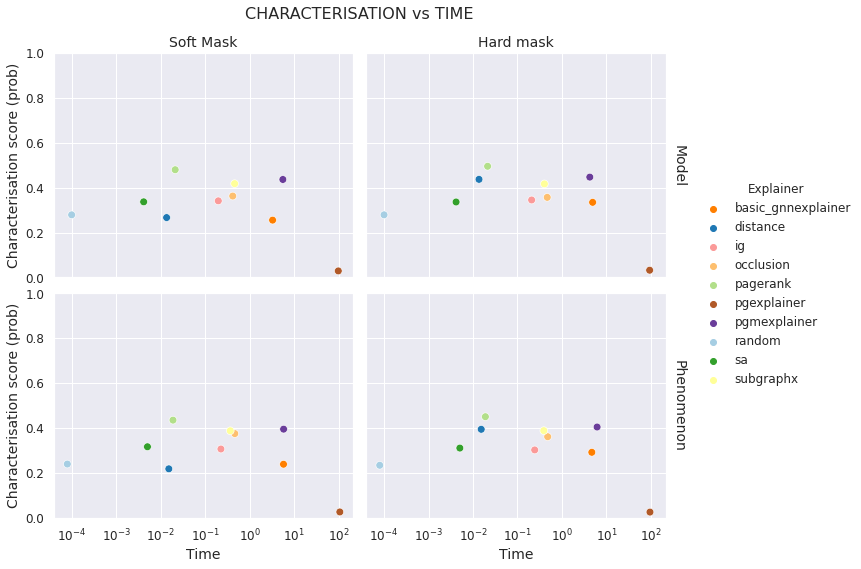

In [36]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o", s=60).set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all syn-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(0,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (prob)")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_prob_logx.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_prob_logx.png')

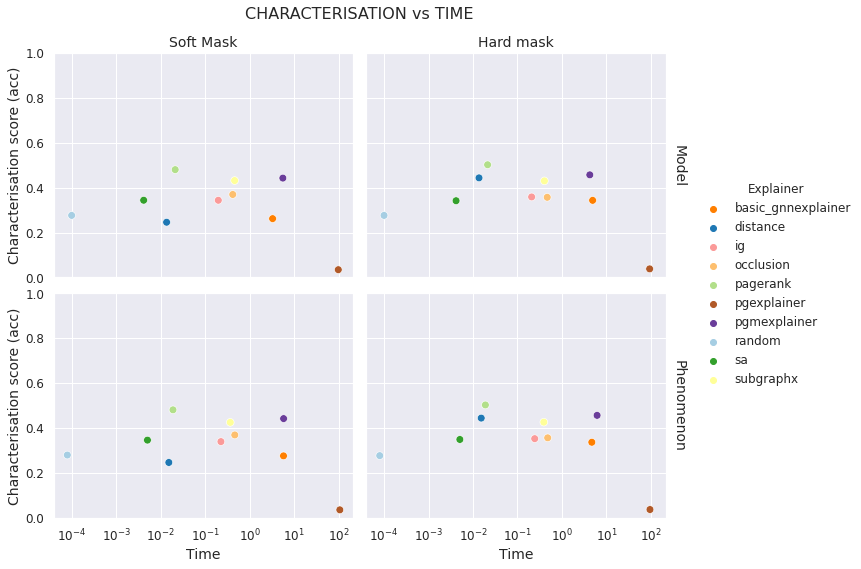

In [37]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="explainer_name", palette=dict_color, marker="o", s=60).set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=16, x=0.43)
g.set(ylim=(0,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score (acc)")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_acc.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_all_acc.png')

## Each dataset

In [38]:
datasets = ["syn1","syn3","syn4","syn5","syn6"]

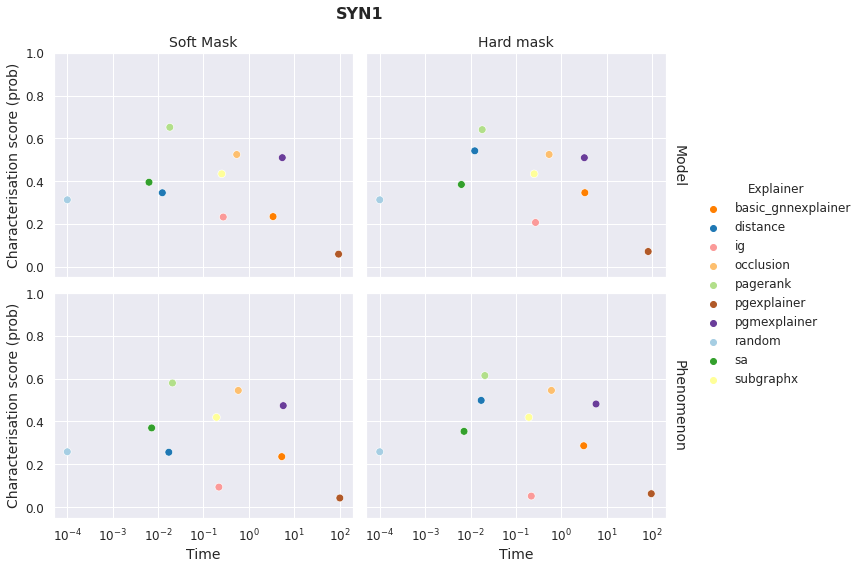

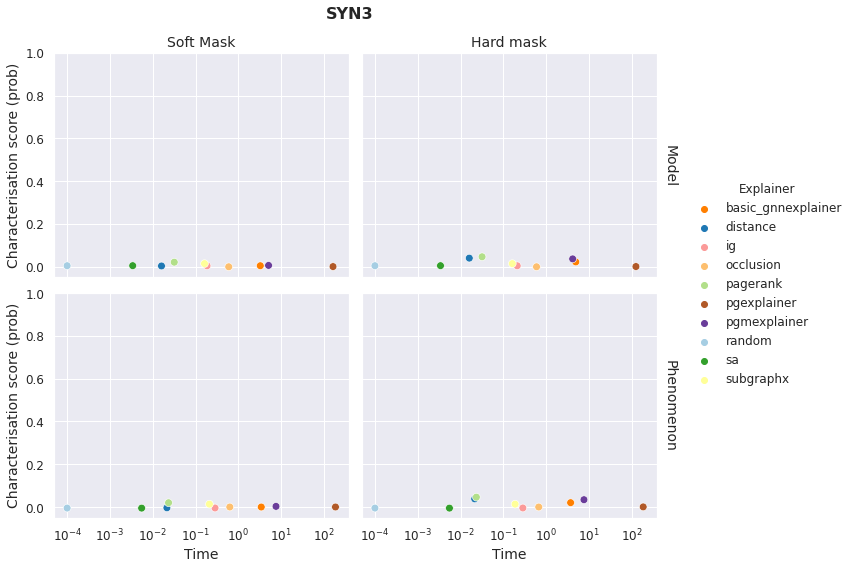

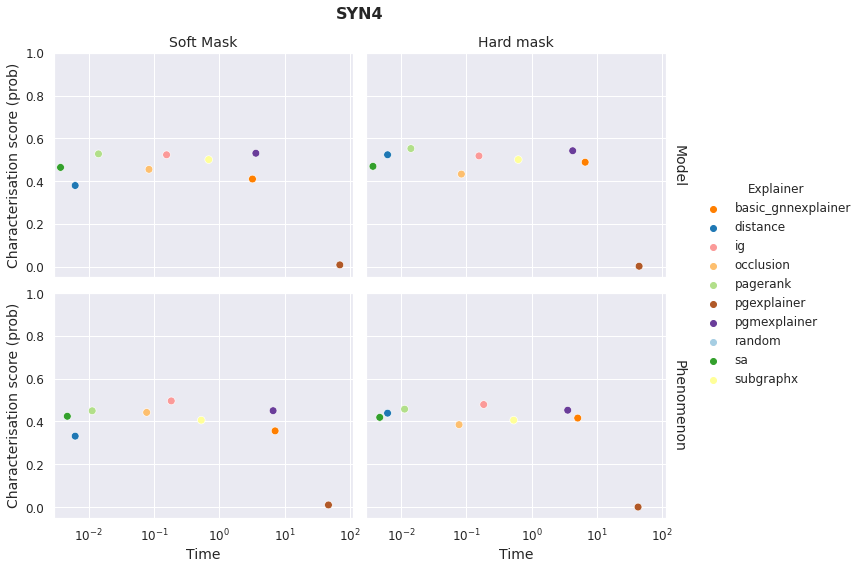

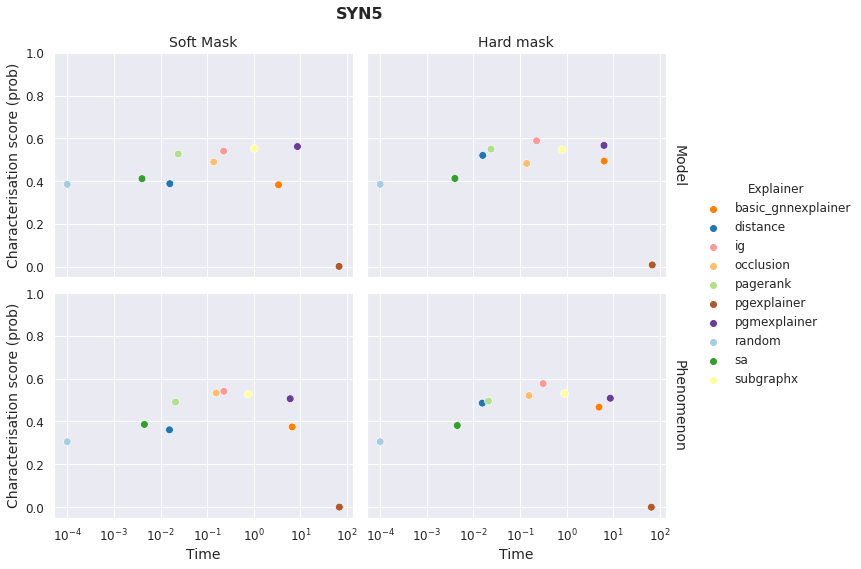

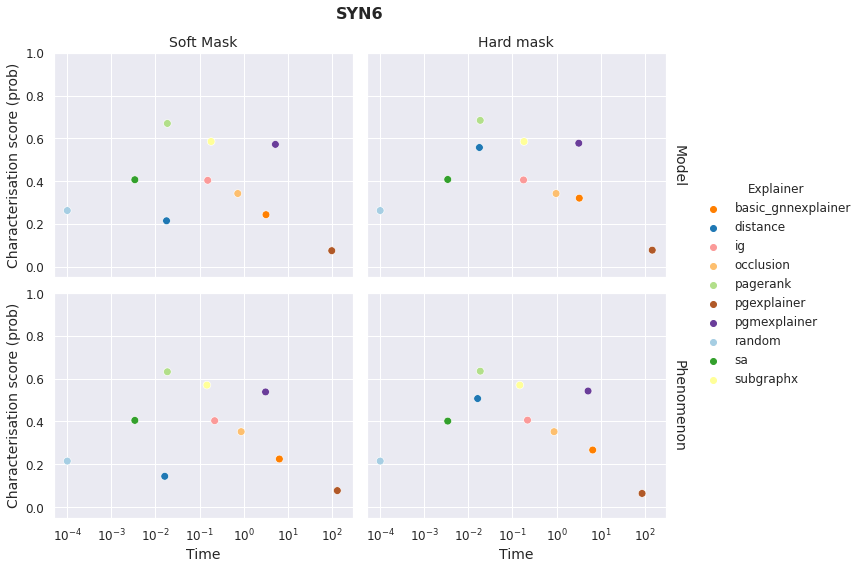

In [39]:
for data in datasets:
    df_gen_data = df_res[df_res['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="time", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o", s=60).set(xscale = 'log')
    g.set(ylim=(-0.05,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(data.upper(), fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Time", y_var="Characterisation score (prob)")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_{data}_prob_logx.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_time/fig_{data}_prob_logx.png')


# Explanation type 
Default topk = 10

In [40]:
df = df_res[df_res['topk']==10]
#df = df_res

## Avg on all datasets

In [41]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [42]:
df_gen = df.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

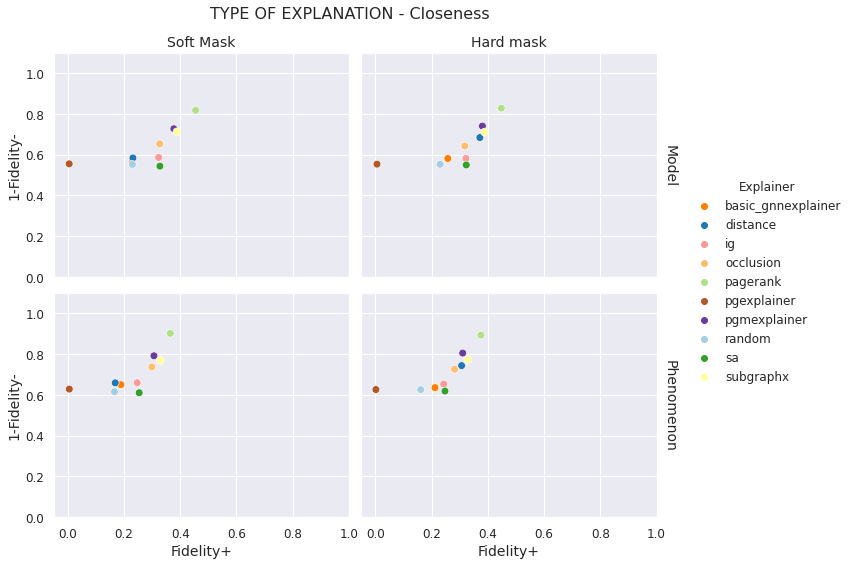

In [47]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_prob+", y="1-fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Closeness", fontsize=16, x=0.43)
#g.fig.suptitle("Averaged on all syn-world datasets", fontsize=12, x=0.43, y=1)

g.set(ylim=(0,1.1))
g.set(xlim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_prob.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_prob.png')

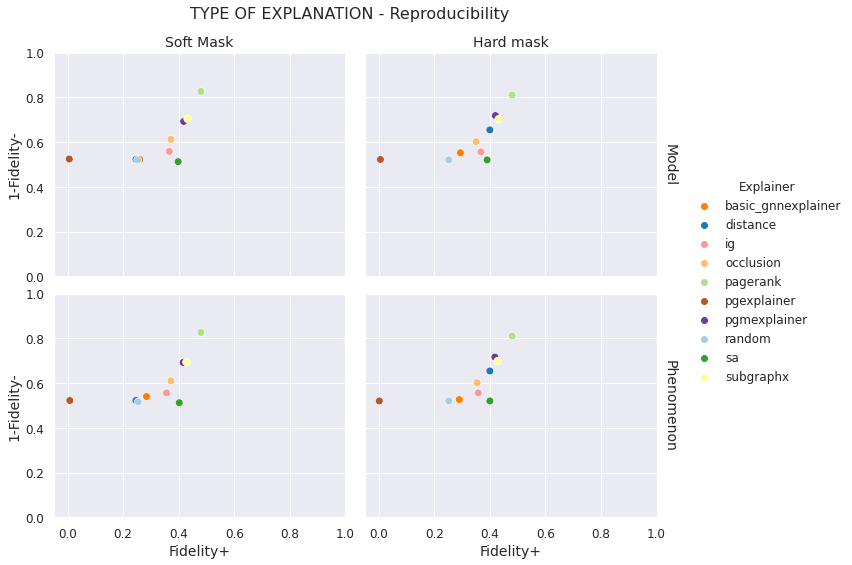

In [48]:
g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
    hue="explainer_name", palette=dict_color, marker="o", s=60)
g.fig.suptitle("TYPE OF EXPLANATION - Reproducibility", fontsize=16, x=0.43)
g.set(ylim=(0,1))
g.set(xlim=(-0.05,1))
g.add_legend(title="Explainer")
g.fig.subplots_adjust(top=0.9)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_acc.pdf')
#g.savefig('/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_0.99_all_acc.png')

## Each dataset

In [49]:
datasets = ["syn1","syn3","syn4","syn5","syn6"]

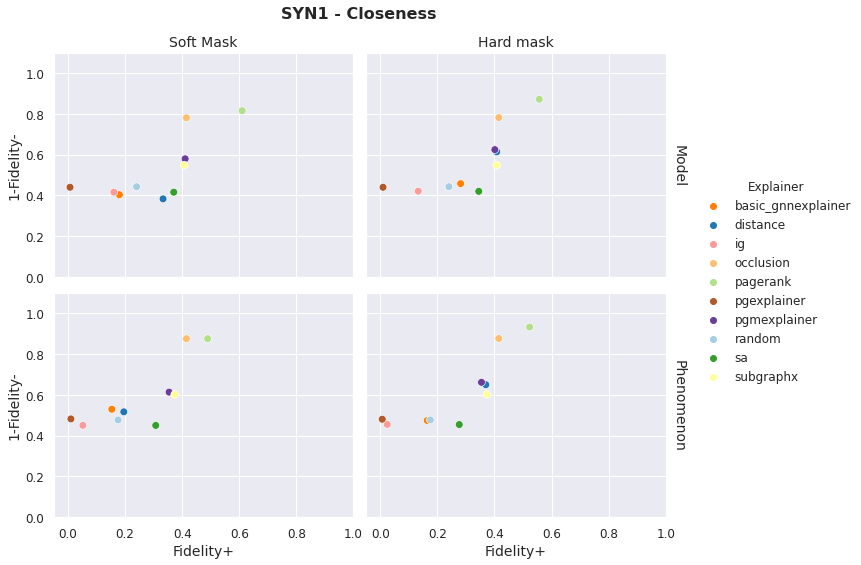

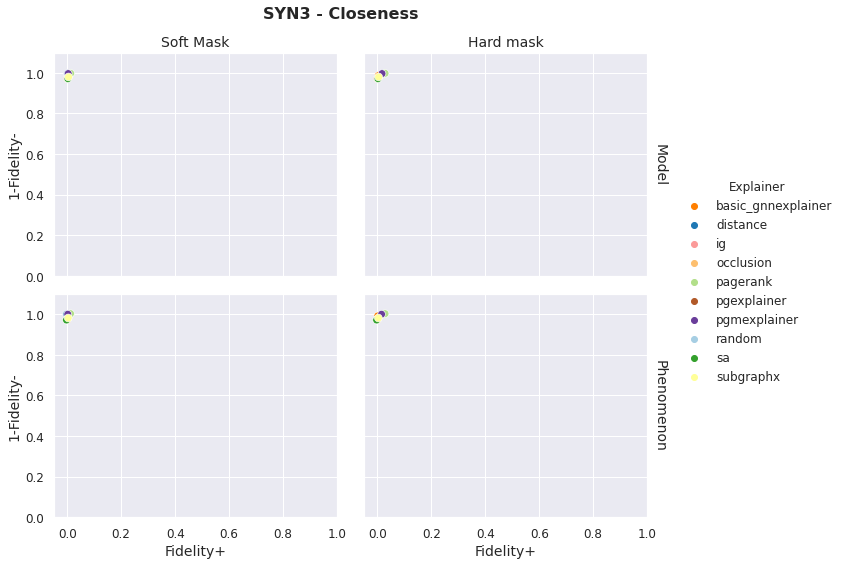

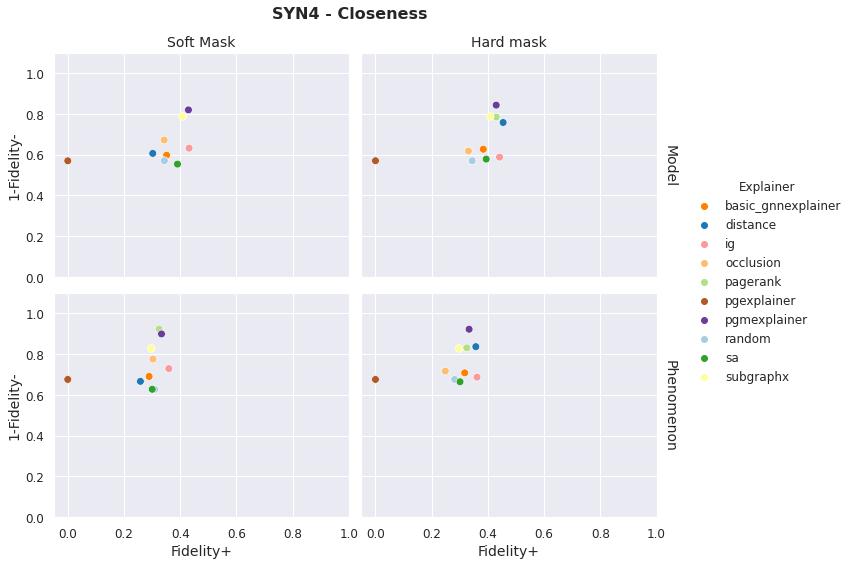

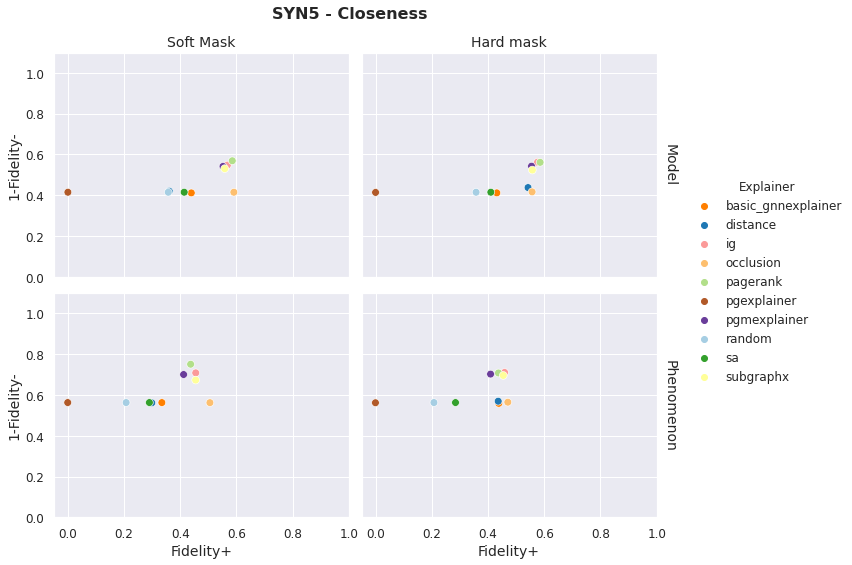

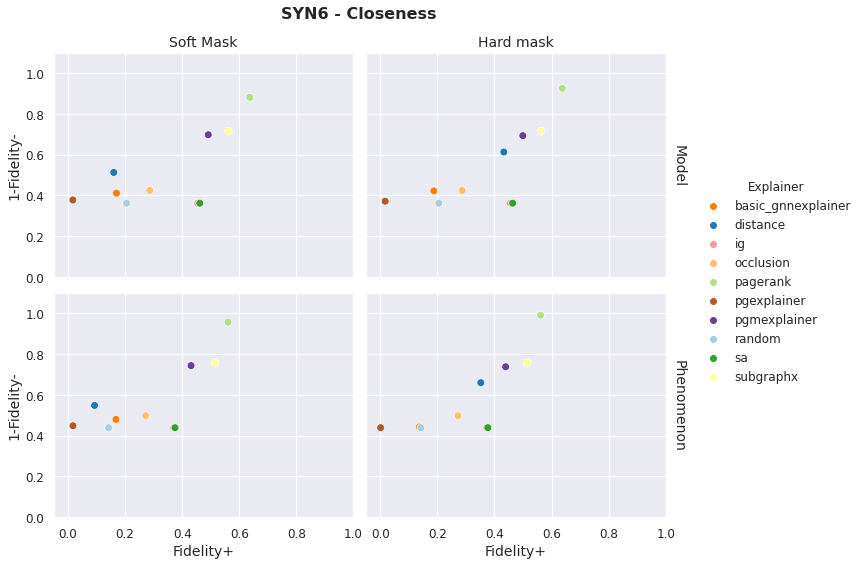

In [50]:
for data in datasets:
    df_gen_data = df[df['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="fidelity_prob+", y="1-fidelity_prob-",
        hue="explainer_name", palette=dict_color, marker="o", s=60)
    g.set(ylim=(0,1.1))
    g.set(xlim=(-0.05,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(data.upper()+' - Closeness', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_k10_{data}_prob.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_k10_{data}_prob.png')


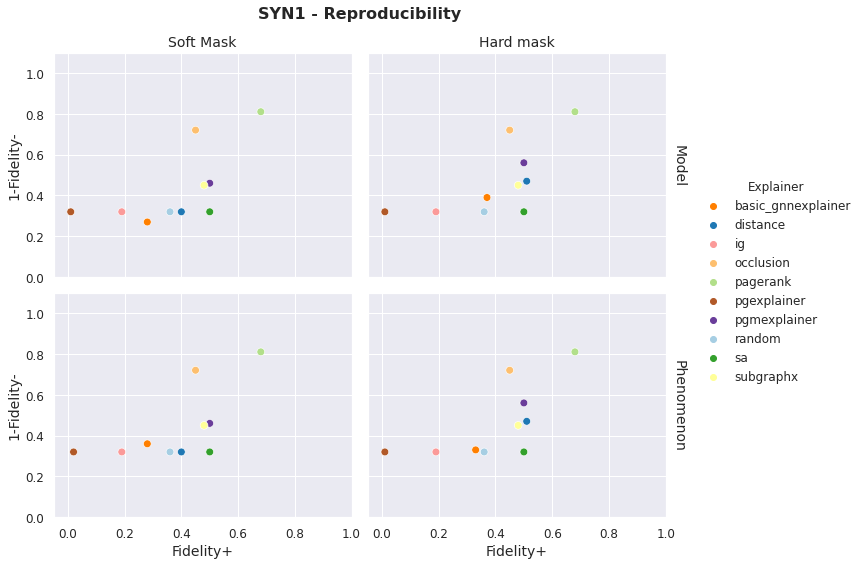

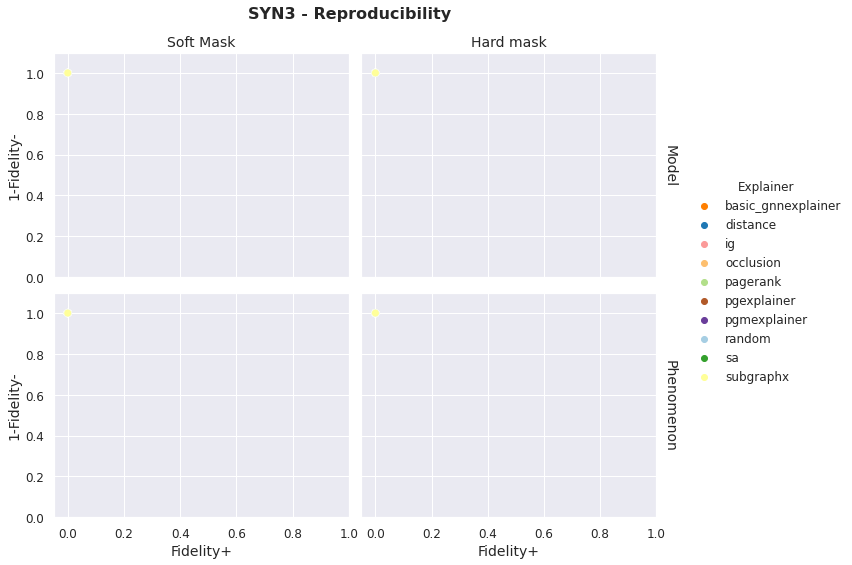

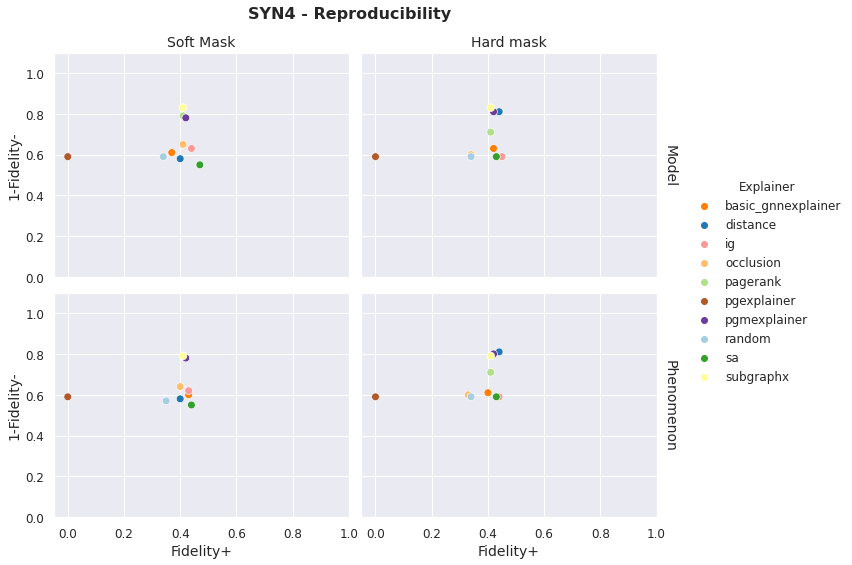

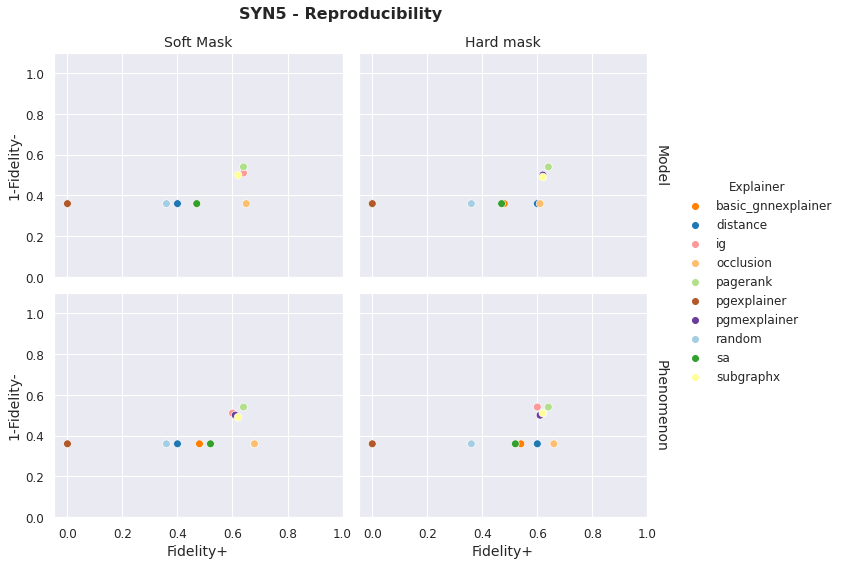

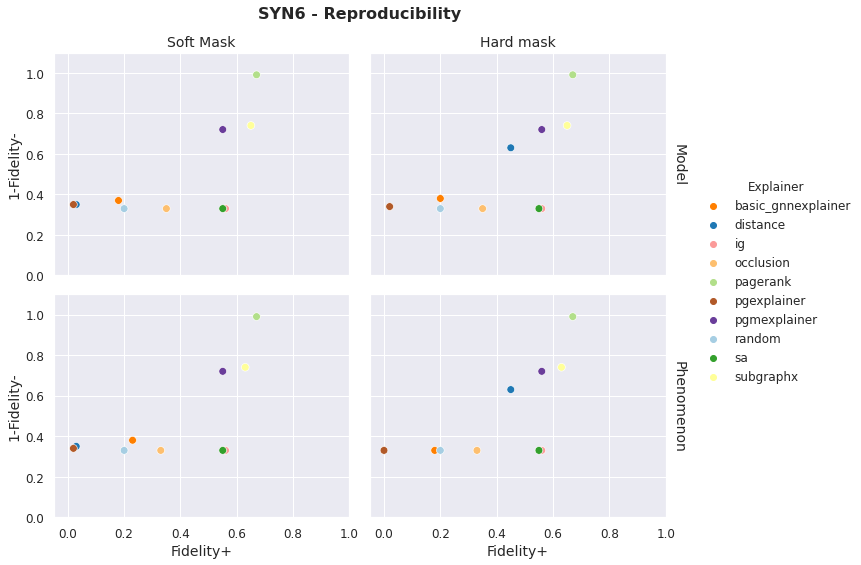

In [51]:
for data in datasets:
    df_gen_data = df[df['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
        hue="explainer_name", palette=dict_color, marker="o", s=60)
    g.set(ylim=(0,1.1))
    g.set(xlim=(-0.05,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle(data.upper()+' - Reproducibility', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_k10_{data}_prob.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/expl_type/fig_expl_type_k10_{data}_prob.png')


# Mask properties vs Performance 
Sparsity = 0 bc we are interested in the initial masks (without transformation)

In [52]:
df = df_res[df_res['topk']==100]
#df = df_res

In [53]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


In [54]:
datasets = ["syn1","syn3","syn4","syn5","syn6"]

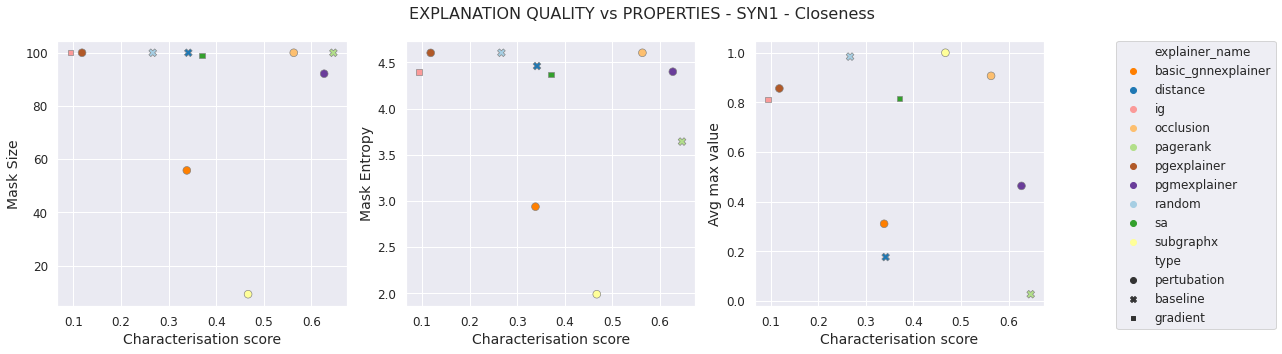

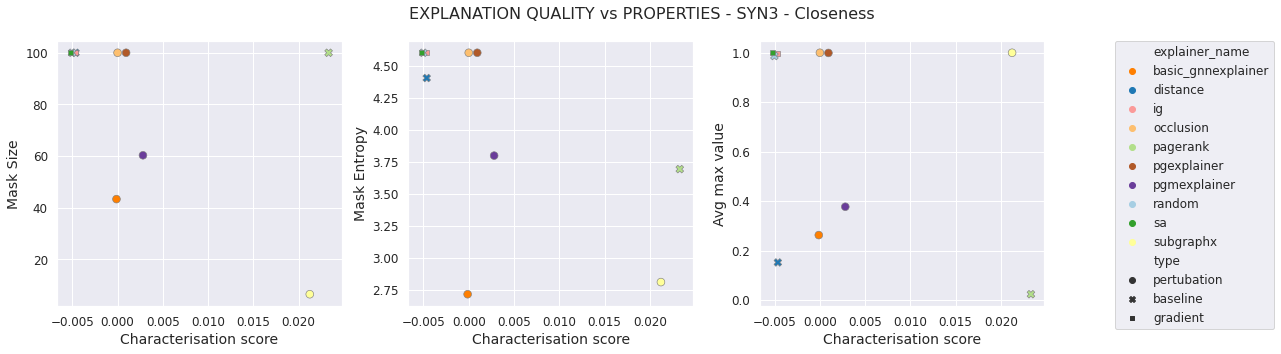

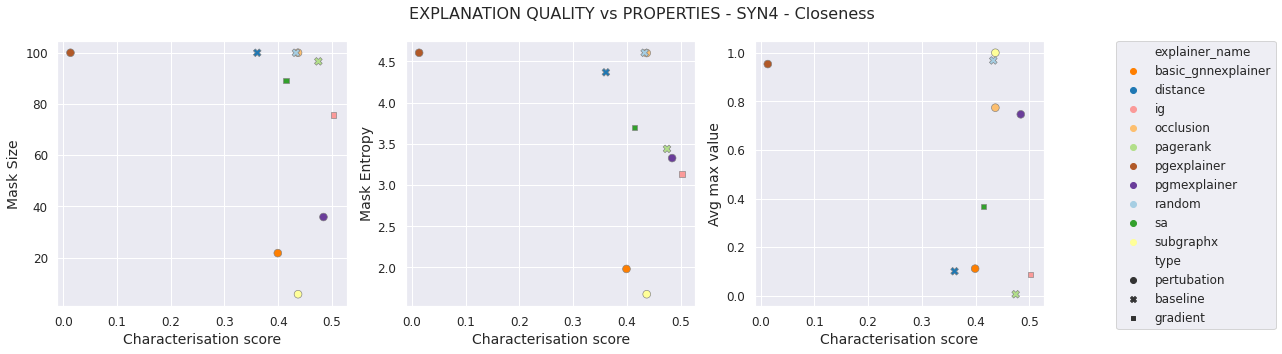

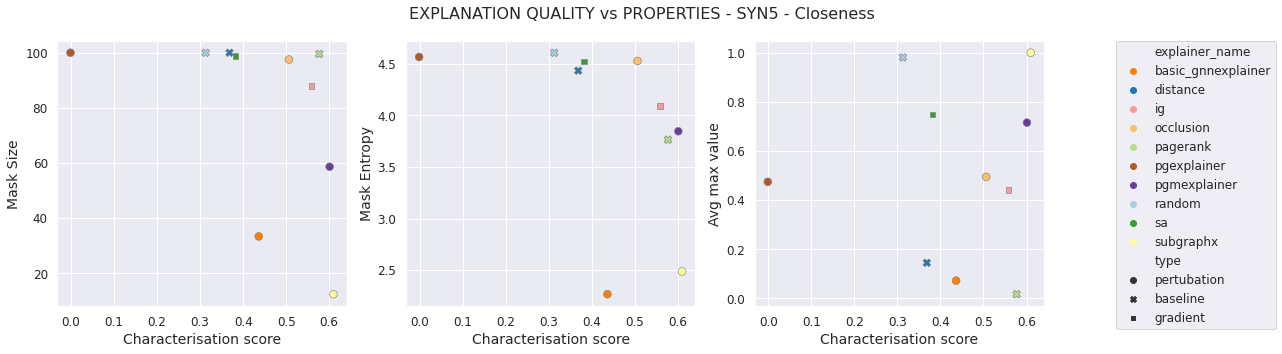

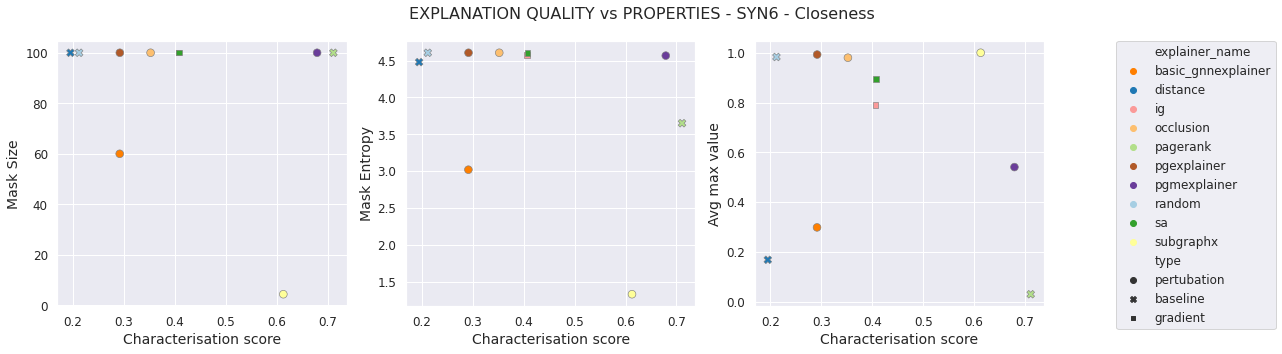

In [55]:
for data in datasets:
    df_mask_data = df[(df['dataset']==data)&(df['true_label_as_target']==True)&(df['hard_mask']==False)]
    fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)
    
    g1 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="mask_size_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
    axs[0].set_ylabel('Mask Size')
    axs[0].set_xlabel('Characterisation score')
    
    g2 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="mask_entropy_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
    axs[1].set_ylabel('Mask Entropy')
    axs[1].set_xlabel('Characterisation score')
    
    g3 = sns.scatterplot(data =df_mask_data, x="charact_prob", y="max_avg_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
    axs[2].set_ylabel('Avg max value')
    axs[2].set_xlabel('Characterisation score')
    
    # produce a legend with the unique colors from the scatter
    plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
    fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - '+data.upper()+' - Closeness', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.pdf')
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.png')


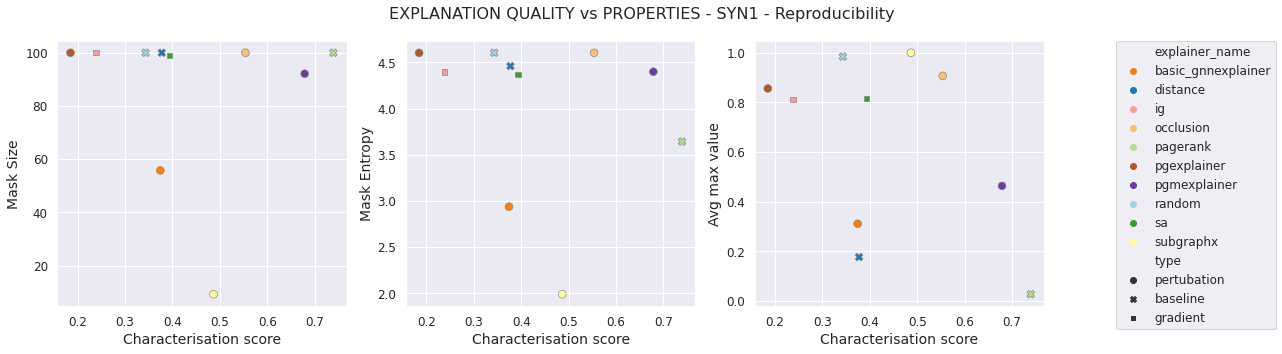

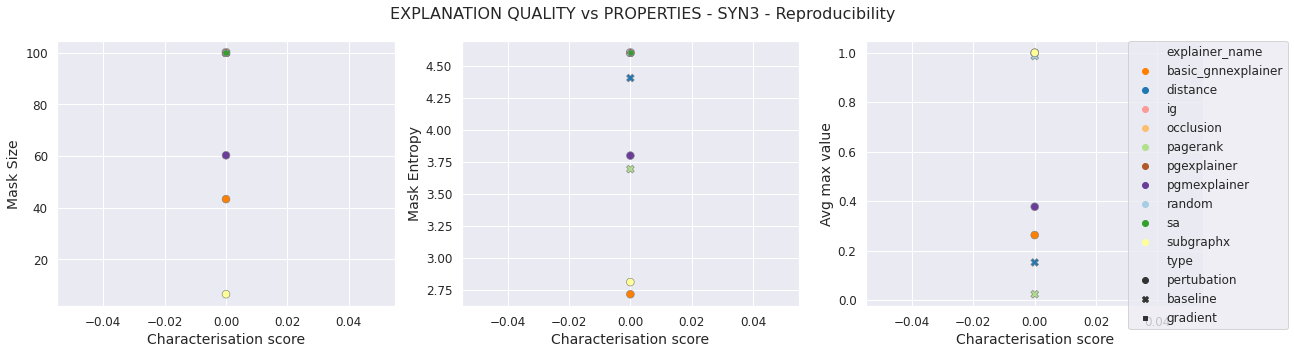

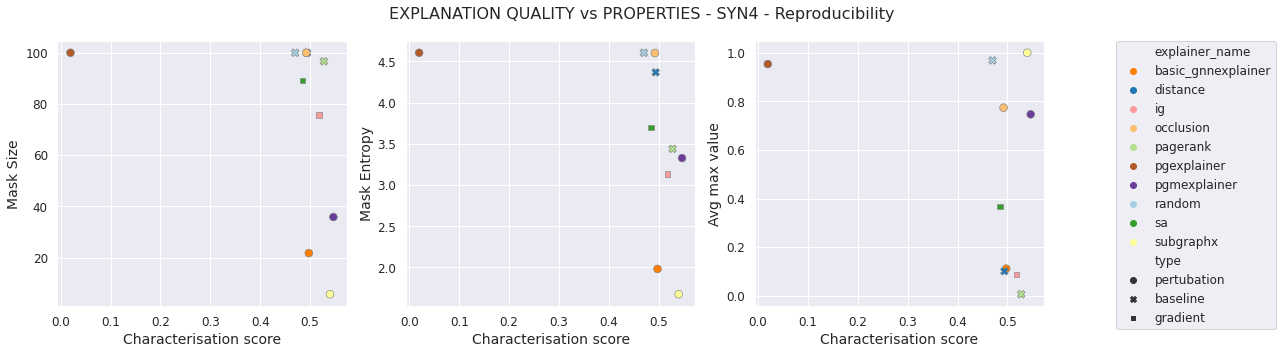

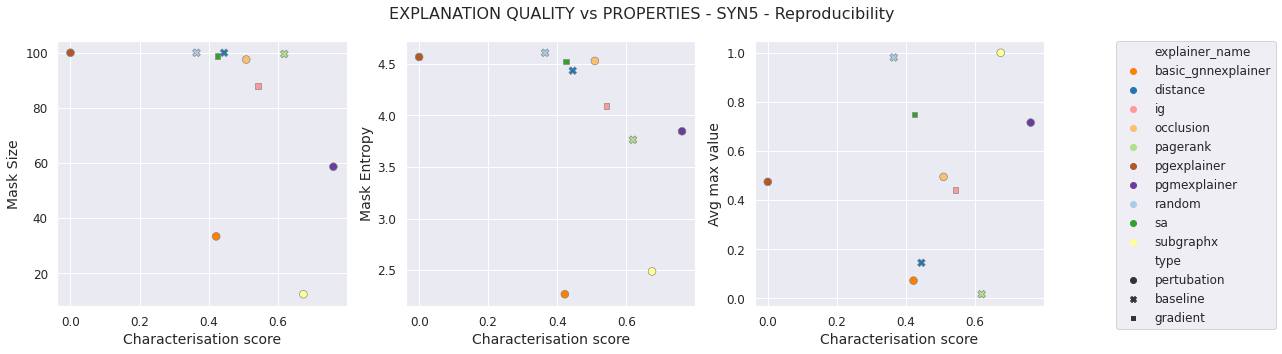

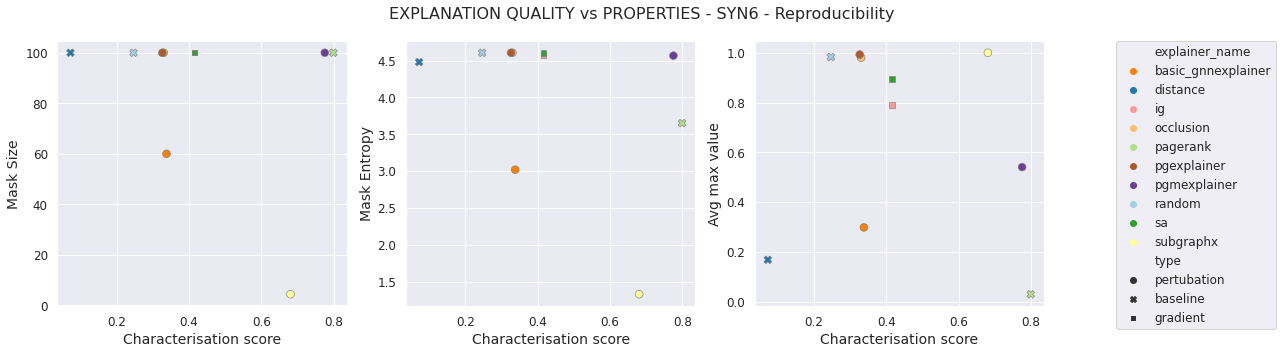

In [57]:
for data in datasets:
    df_mask_data = df[(df['dataset']==data)&(df['true_label_as_target']==True)&(df['hard_mask']==False)]
    fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)
    
    g1 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_size_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
    axs[0].set_ylabel('Mask Size')
    axs[0].set_xlabel('Characterisation score')
    
    g2 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_entropy_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
    axs[1].set_ylabel('Mask Entropy')
    axs[1].set_xlabel('Characterisation score')
    
    g3 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="max_avg_transf",
        hue="explainer_name", palette=dict_color, marker="o", s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
    axs[2].set_ylabel('Avg max value')
    axs[2].set_xlabel('Characterisation score')
    
    # produce a legend with the unique colors from the scatter
    plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
    fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - '+data.upper()+' - Reproducibility', fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_acc.pdf')
    #fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_acc.png')


# Closeness vs Reproducibility

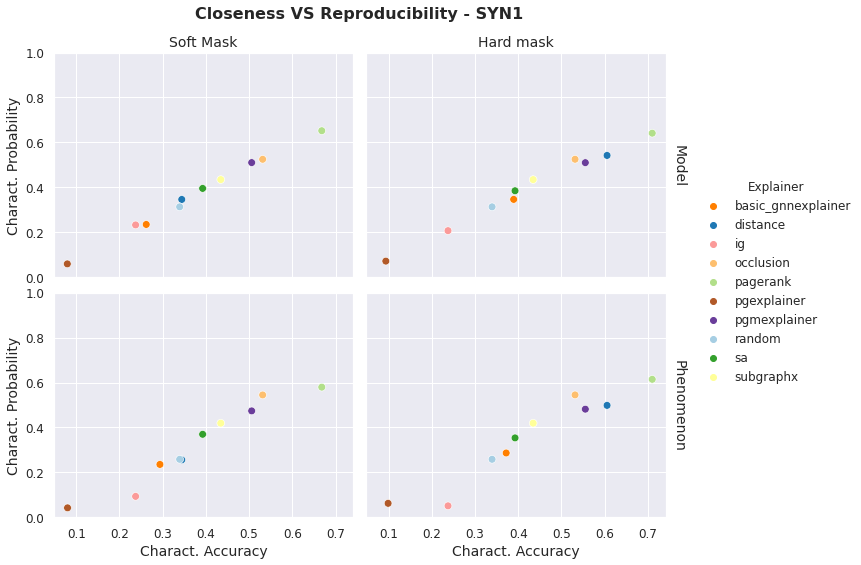

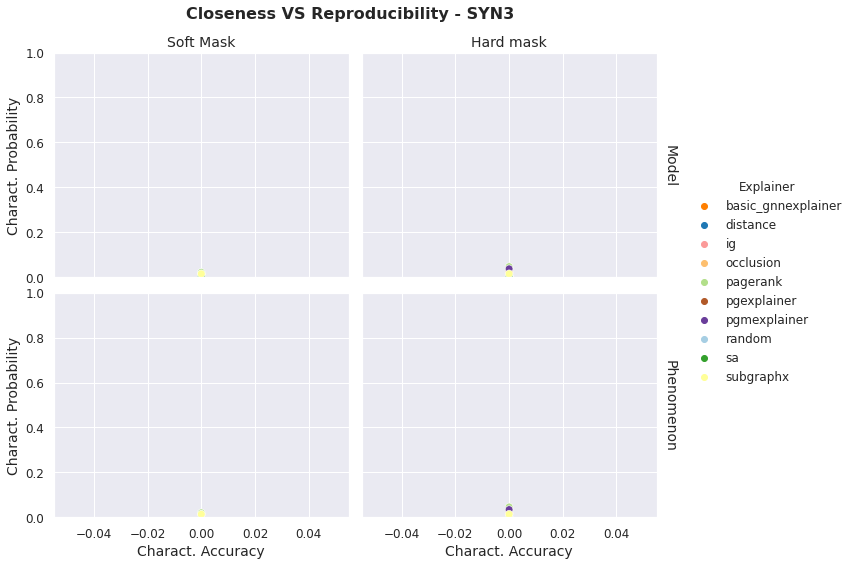

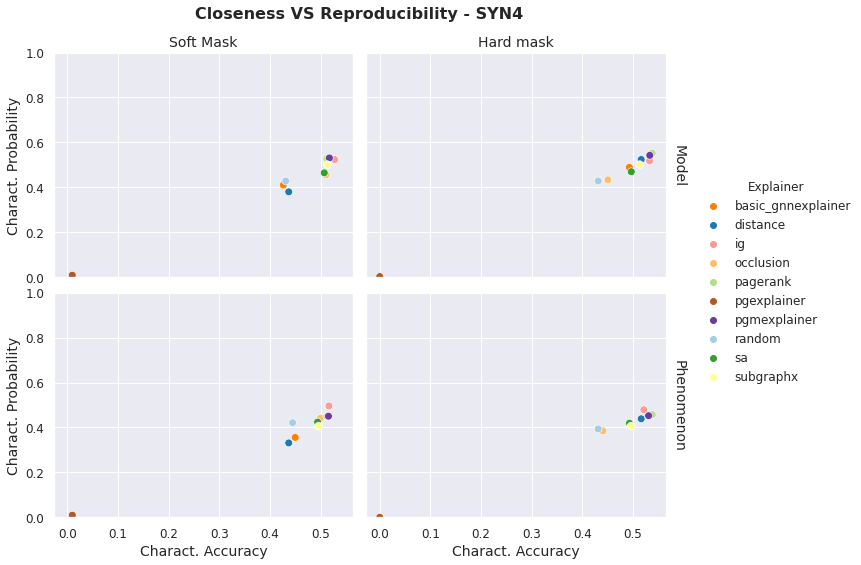

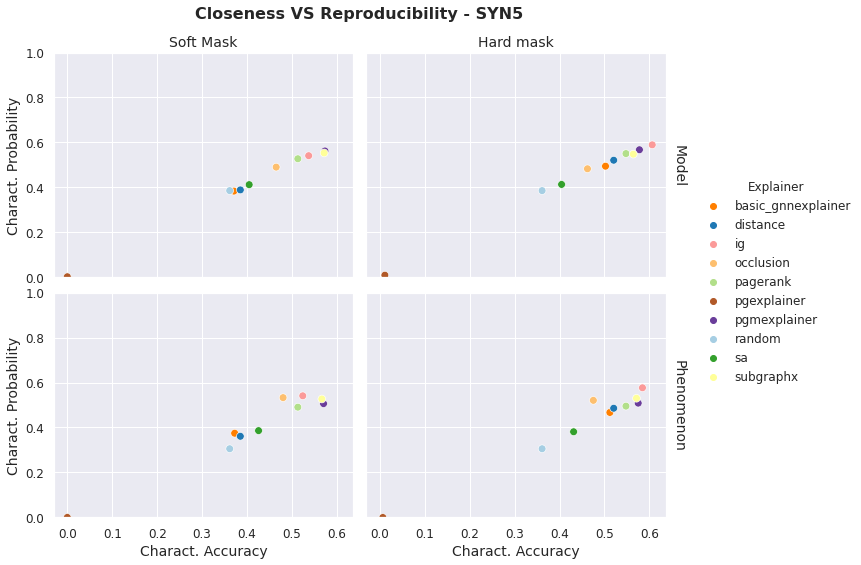

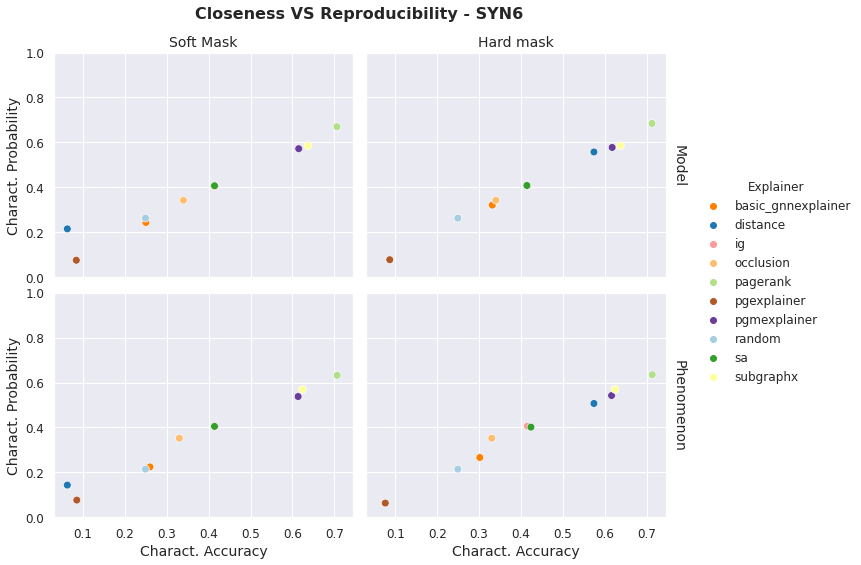

In [58]:
for data in datasets:
    df_gen_data = df_res[df_res['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.scatterplot, x="charact_acc", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o", s=60)
    g.set(ylim=(0,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Closeness VS Reproducibility - '+data.upper(), fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="Charact. Accuracy", y_var="Charact. Probability")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/prob_vs_acc/fig_prob_vs_acc_{data}.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/prob_vs_acc/fig_prob_vs_acc_{data}.png')


# Consistency - Performance vs Sparsity

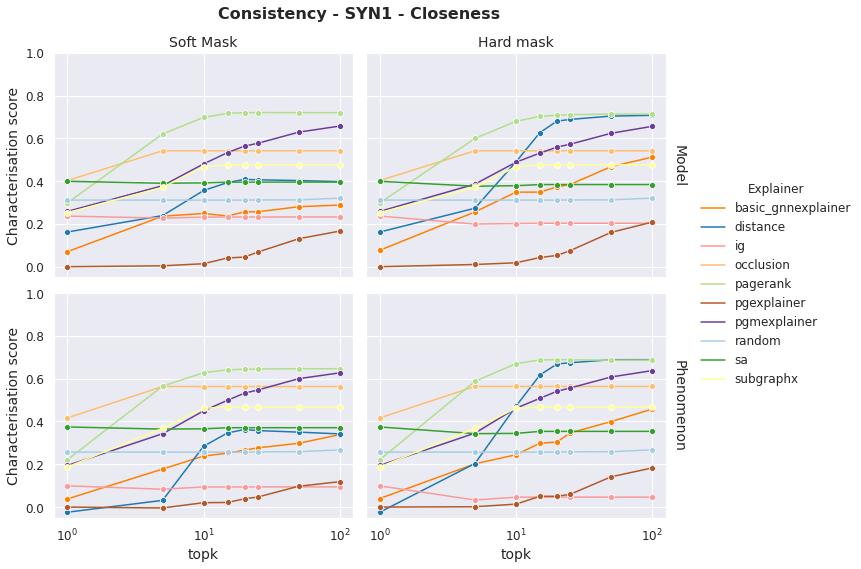

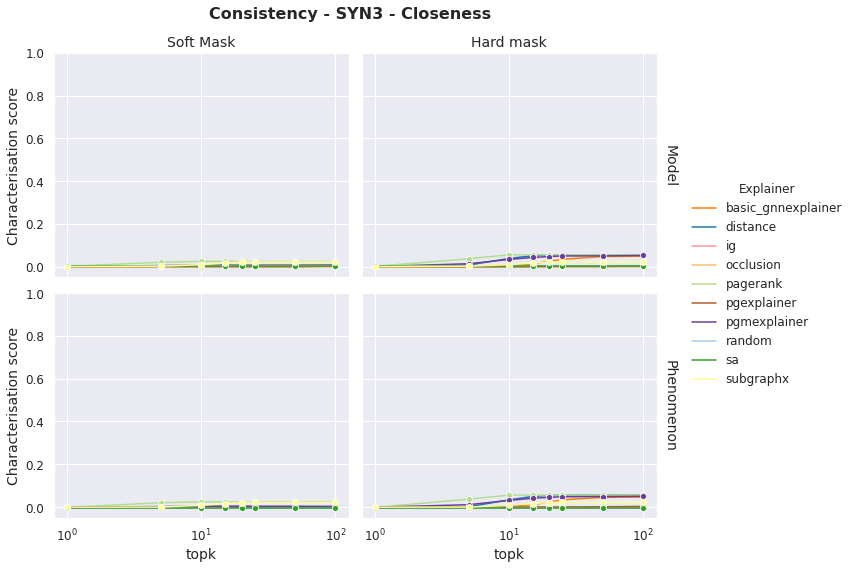

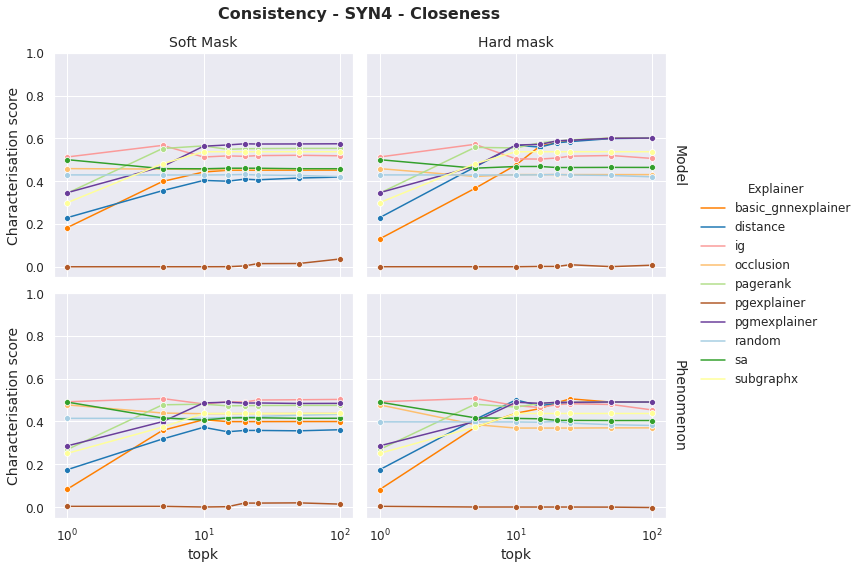

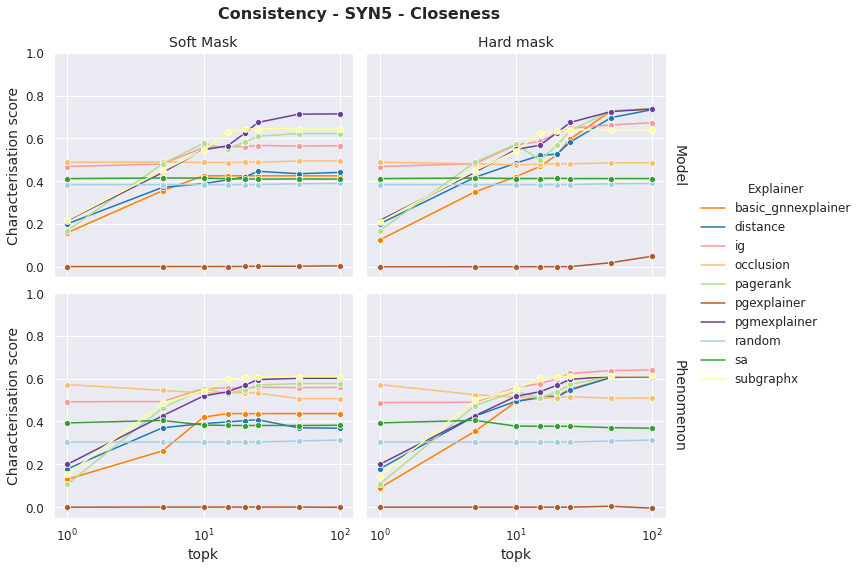

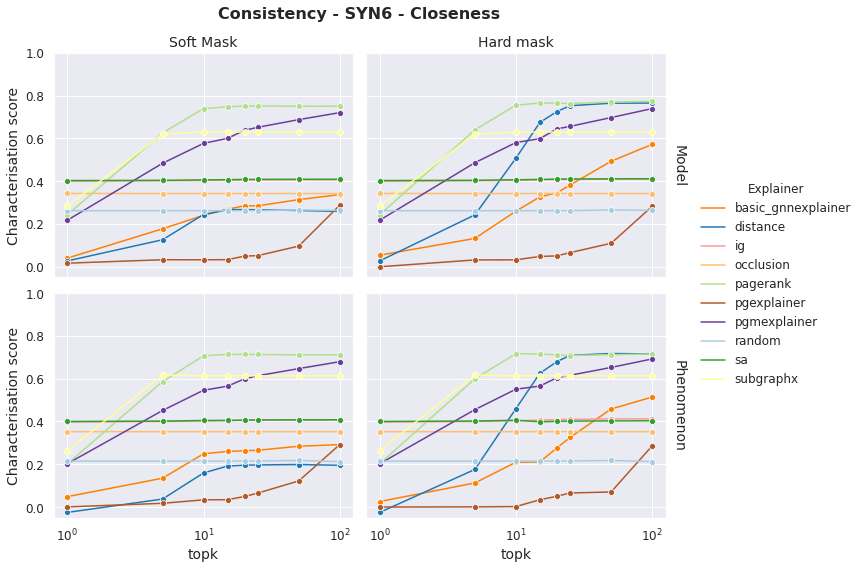

In [101]:
for data in datasets:
    df_gen_data = df_res[df_res['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'topk']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.lineplot, x="topk", y="charact_prob",
        hue="explainer_name", palette=dict_color, marker="o").set(xscale = 'log')
    g.set(ylim=(-0.05,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Consistency - '+data.upper()+' - Closeness', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="topk", y_var="Characterisation score")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.png')


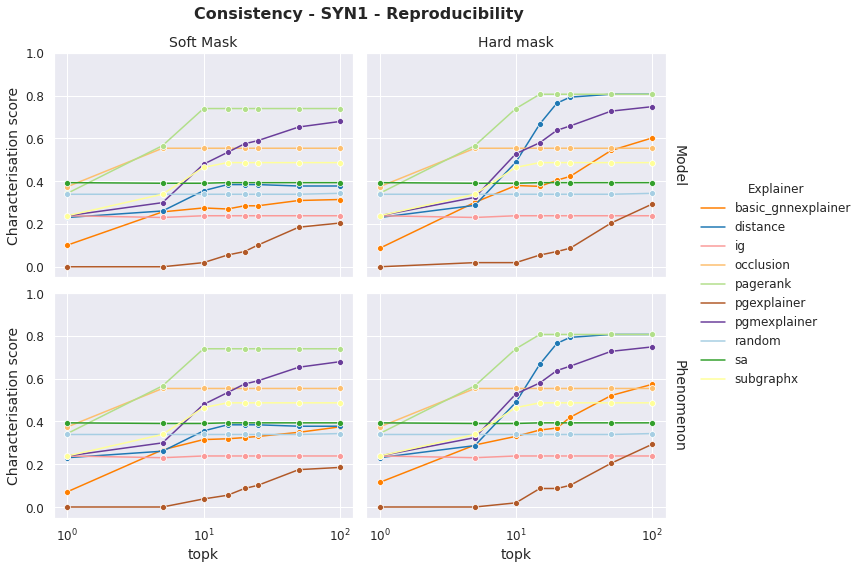

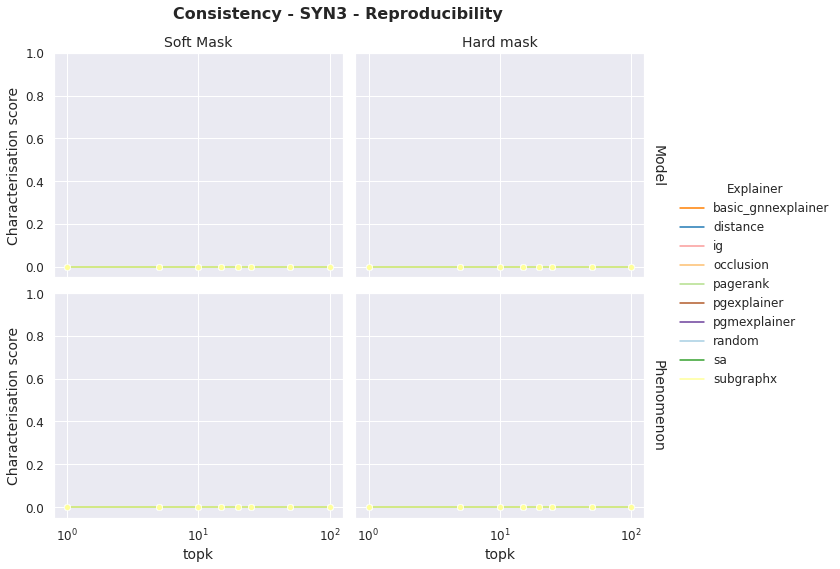

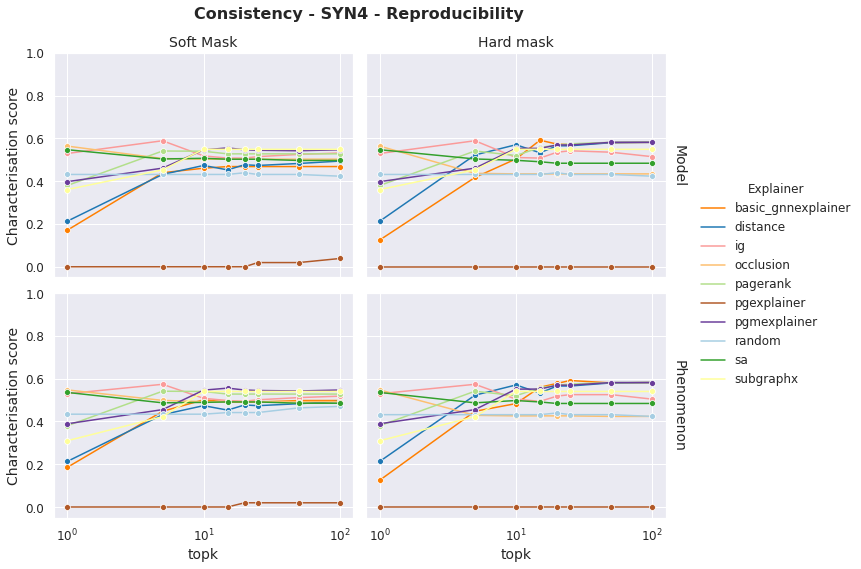

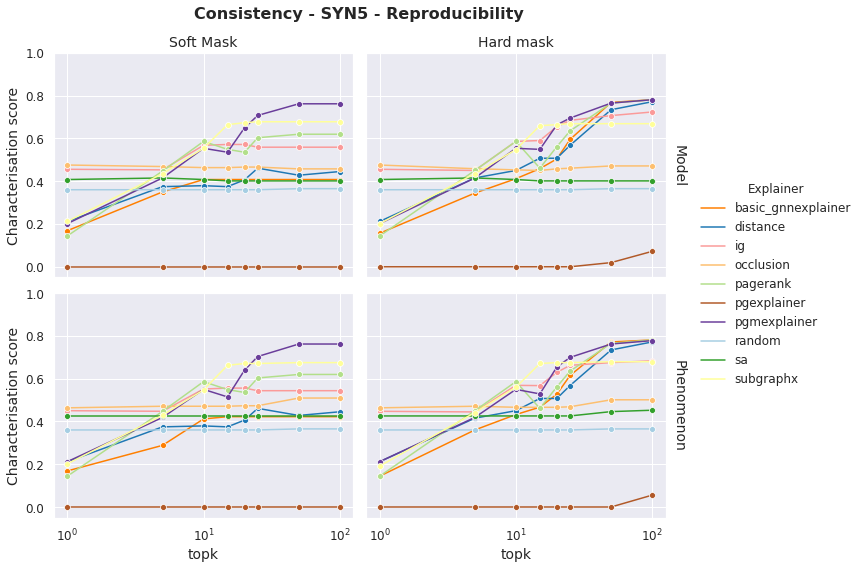

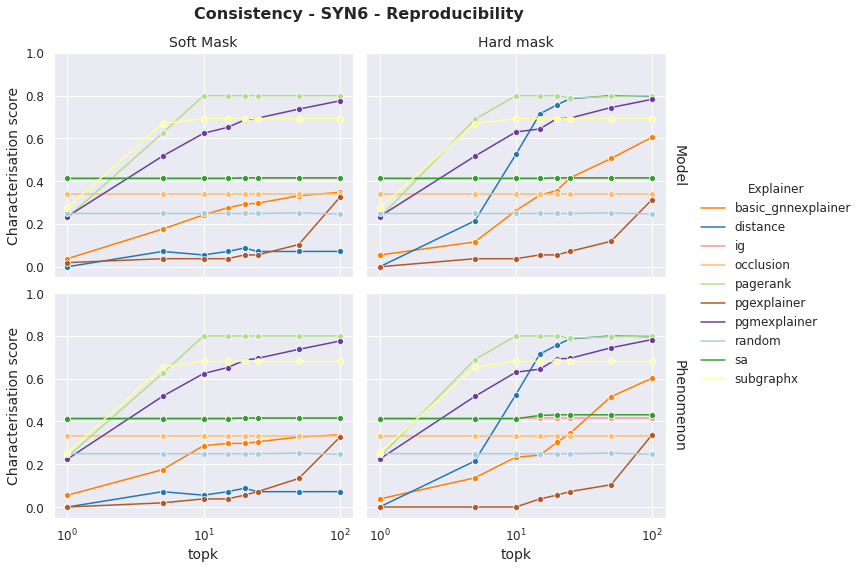

In [100]:
for data in datasets:
    df_gen_data = df_res[df_res['dataset']==data].groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'topk']).mean()
    df_gen_data = df_gen_data.reset_index()
    df_gen_data['hard_mask'] = df_gen_data['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
    df_gen_data['true_label_as_target'] = df_gen_data['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})
    
    g = sns.FacetGrid(df_gen_data, row='true_label_as_target', col="hard_mask", height=4, aspect=1.25, margin_titles=True, despine=False)
    g.map_dataframe(sns.lineplot, x="topk", y="charact_acc",
        hue="explainer_name", palette=dict_color, marker="o").set(xscale = 'log')
    g.set(ylim=(-0.05,1))
    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Consistency - '+data.upper()+' - Reproducibility', fontsize=16, weight='bold', x=0.43)
    g.add_legend(title="Explainer")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    g.set_axis_labels(x_var="topk", y_var="Characterisation score")
    
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.pdf')
    #g.savefig(f'/cluster/home/kamara/Explain/figures/topk/consistency/fig_consistency_{data}.png')


# Explain focus: Phenomenon

true_label_as_target = True

In [61]:
df = df_res[df_res['true_label_as_target']==True]

In [62]:
#### Robustness ####
df_sparse = df[df['topk'] == 10]
df_dense = df[df['topk'] ==100]
df_sparse = df_sparse[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_dense = df_dense[["dataset", "true_label_as_target", "hard_mask", "explainer_name", "charact_prob"]].reset_index()
df_robust = pd.merge(df_dense, df_sparse, on=["dataset", "true_label_as_target", "hard_mask", "explainer_name"], how="outer", suffixes=["_100", "_10"])

df_robust["robustness"] = (df_robust["charact_prob_10"]-df_robust["charact_prob_100"])

robustness = pd.pivot_table(df_robust, values='robustness', index=['explainer_name'], columns='dataset')
robustness['robustness'] = robustness.mean(axis=1)
robustness.sort_values(by=['robustness'])

dataset                 syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                         
basic_gnnexplainer -0.156829 -0.021488 -0.021875 -0.066853 -0.173555   
pgmexplainer       -0.176746 -0.008924  0.000533 -0.087039 -0.137395   
pgexplainer        -0.133653 -0.001904 -0.005585  0.002890 -0.270702   
distance           -0.137553 -0.010443  0.010590 -0.046854 -0.145875   
subgraphx          -0.005967 -0.013517  0.000000 -0.064875  0.000000   
pagerank           -0.017403  0.000527 -0.008905 -0.046183 -0.001411   
ig                 -0.000271  0.000146 -0.000718 -0.043681 -0.006934   
random             -0.010526  0.000037 -0.001125 -0.009365  0.002568   
sa                 -0.007409  0.000000  0.000793  0.005413 -0.000371   
occlusion           0.000000  0.000000 -0.000954  0.015370 -0.000003   

dataset             robustness  
explainer_name                  
basic_gnnexplainer   -0.088120  
pgmexplainer         -0.081914  
pgexplainer          -0.081791  
distance             -0.066027  
subgraphx            -0.016872  
pagerank             -0.014675  
ig                   -0.010291  
random               -0.003682  
sa                   -0.000315  
occlusion             0.002883

## Hard mask

In [63]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [64]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.topk==10]
res_init = df0s[['dataset', 'explainer_name', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_size_init  number_of_edges      time  \
dataset explainer_name                                                  
syn1    basic_gnnexplainer          249.76           4110.0    3.1185   
        distance                   4053.49           4110.0    0.0172   
        ig                         4104.06           4110.0    0.2184   
        occlusion                  4108.95           4110.0    0.6065   
        pagerank                   2999.84           4110.0    0.0207   
        pgexplainer                 761.16           4110.0   96.1166   
        pgmexplainer                701.42           4110.0    5.8271   
        random                     4104.90           4110.0    0.0001   
        sa                         3384.78           4110.0    0.0072   
        subgraphx                     9.24           4110.0    0.1930   
syn3    basic_gnnexplainer          190.28           5080.0    3.7190   
        distance                   5036.28           5080.0    0.0214   
        ig                         5076.96           5080.0    0.2850   
        occlusion                  5078.17           5080.0    0.6694   
        pagerank                   2317.54           5080.0    0.0234   
        pgexplainer                1906.60           5080.0  184.4458   
        pgmexplainer                428.62           5080.0    7.6248   
        random                     5074.41           5080.0    0.0001   
        sa                         5076.40           5080.0    0.0055   
        subgraphx                     6.46           5080.0    0.1878   
syn4    basic_gnnexplainer           21.72           1950.0    5.0640   
        distance                   1938.08           1950.0    0.0062   
        ig                         1255.24           1950.0    0.1837   
        occlusion                  1947.86           1950.0    0.0771   
        pagerank                    166.86           1950.0    0.0113   
        pgexplainer                1480.56           1950.0   42.5475   
        pgmexplainer                 36.00           1950.0    3.5580   
        random                     1946.97           1950.0    0.0000   
        sa                         1584.00           1950.0    0.0047   
        subgraphx                     5.66           1950.0    0.5291   
syn5    basic_gnnexplainer           33.42           3410.0    4.9223   
        distance                   3405.61           3410.0    0.0155   
        ig                         2699.48           3410.0    0.3111   
        occlusion                  3207.14           3410.0    0.1552   
        pagerank                    414.58           3410.0    0.0209   
        pgexplainer                1542.92           3410.0   65.2095   
        pgmexplainer                 62.12           3410.0    8.5877   
        random                     3405.68           3410.0    0.0001   
        sa                         2944.62           3410.0    0.0045   
        subgraphx                    12.48           3410.0    0.8964   
syn6    basic_gnnexplainer          307.46           3948.0    6.5951   
        distance                   3799.10           3948.0    0.0162   
        ig                         3944.88           3948.0    0.2196   
        occlusion                  3946.42           3948.0    0.8768   
        pagerank                   3048.36           3948.0    0.0186   
        pgexplainer                 635.38           3948.0   86.9581   
        pgmexplainer                891.10           3948.0    5.1799   
        random                     3943.18           3948.0    0.0001   
        sa                         3944.62           3948.0    0.0034   
        subgraphx                     4.44           3948.0    0.1467   

                            fidelity_prob+  fidelity_prob-  charact_prob  
dataset explainer_name                                                    
syn1    basic_gnnexplainer        0.164379        0.525841      0.244125  
      

In [65]:
#### Initial mask sparsity ####
mask_size_init = pd.pivot_table(res_init, values='mask_size_init', index=['explainer_name'], columns='dataset')
mask_size_init['mean_size'] = mask_size_init.mean(axis=1)
mask_size_init.sort_values(by=['mean_size'])

dataset                syn1     syn3     syn4     syn5     syn6  mean_size
explainer_name                                                            
subgraphx              9.24     6.46     5.66    12.48     4.44      7.656
basic_gnnexplainer   249.76   190.28    21.72    33.42   307.46    160.528
pgmexplainer         701.42   428.62    36.00    62.12   891.10    423.852
pgexplainer          761.16  1906.60  1480.56  1542.92   635.38   1265.324
pagerank            2999.84  2317.54   166.86   414.58  3048.36   1789.436
sa                  3384.78  5076.40  1584.00  2944.62  3944.62   3386.884
ig                  4104.06  5076.96  1255.24  2699.48  3944.88   3416.124
distance            4053.49  5036.28  1938.08  3405.61  3799.10   3646.512
occlusion           4108.95  5078.17  1947.86  3207.14  3946.42   3657.708
random              4104.90  5074.41  1946.97  3405.68  3943.18   3695.028

In [66]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset                syn1      syn3     syn4     syn5     syn6  mean_time
explainer_name                                                             
random               0.0001    0.0001   0.0000   0.0001   0.0001    0.00008
sa                   0.0072    0.0055   0.0047   0.0045   0.0034    0.00506
distance             0.0172    0.0214   0.0062   0.0155   0.0162    0.01530
pagerank             0.0207    0.0234   0.0113   0.0209   0.0186    0.01898
ig                   0.2184    0.2850   0.1837   0.3111   0.2196    0.24356
subgraphx            0.1930    0.1878   0.5291   0.8964   0.1467    0.39060
occlusion            0.6065    0.6694   0.0771   0.1552   0.8768    0.47700
basic_gnnexplainer   3.1185    3.7190   5.0640   4.9223   6.5951    4.68378
pgmexplainer         5.8271    7.6248   3.5580   8.5877   5.1799    6.15550
pgexplainer         96.1166  184.4458  42.5475  65.2095  86.9581   95.05550

In [67]:
#### Average characterization power among datasets for sparsity=0.99 ####
df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])#.reset_index()

dataset                 syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                         
pgexplainer         0.013462 -0.000008 -0.000098 -0.000810  0.002037   
random              0.256444 -0.004990  0.397568  0.303354  0.214515   
basic_gnnexplainer  0.244125  0.003206  0.438131  0.491323  0.209151   
ig                  0.046092 -0.004548  0.473343  0.557614  0.402788   
sa                  0.343877 -0.005230  0.413993  0.377805  0.405400   
occlusion           0.563200  0.000000  0.368849  0.513288  0.352082   
distance            0.471075  0.033736  0.500220  0.494012  0.459033   
pgmexplainer        0.461541  0.030752  0.489289  0.517020  0.550348   
subgraphx           0.461146  0.007717  0.436958  0.549685  0.612720   
pagerank            0.670065  0.055665  0.466938  0.540561  0.716304   

dataset             mean_charact  
explainer_name                    
pgexplainer             0.002917  
random                  0.233378  
basic_gnnexplainer      0.277187  
ig                      0.295058  
sa                      0.307169  
occlusion               0.359484  
distance                0.391615  
pgmexplainer            0.409790  
subgraphx               0.413645  
pagerank                0.489907

In [68]:
#### Average characterization power for syn1 according to sparsity ####
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'topk', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name', 'topk']).mean()

df_char_syn1 = pd.pivot_table(res_init[res_init.dataset=="syn1"], values='charact_prob', index=['explainer_name'], columns='topk')
df_char_syn1['mean_charact'] = df_char_syn1.mean(axis=1)
df_char_syn1.sort_values(by=['mean_charact'])

topk                     1.0       5.0      10.0      15.0      20.0  \
explainer_name                                                         
ig                  0.098826  0.032450  0.046092  0.046155  0.046155   
pgexplainer        -0.000329  0.001141  0.013462  0.049982  0.049988   
random              0.256445  0.256445  0.256444  0.256444  0.256443   
basic_gnnexplainer  0.039561  0.201718  0.244125  0.298190  0.303562   
sa                  0.373957  0.342754  0.343877  0.353293  0.353366   
subgraphx           0.187141  0.367740  0.461146  0.467114  0.467114   
pgmexplainer        0.193991  0.345267  0.461541  0.508097  0.540737   
distance           -0.024403  0.203229  0.471075  0.616783  0.668313   
occlusion           0.416186  0.563200  0.563200  0.563200  0.563200   
pagerank            0.220515  0.586951  0.670065  0.687198  0.688704   

topk                    25.0      50.0     100.0  mean_charact  
explainer_name                                                  
ig                  0.046155  0.046155  0.046155      0.051018  
pgexplainer         0.059328  0.141268  0.182586      0.062178  
random              0.257659  0.258451  0.267117      0.258181  
basic_gnnexplainer  0.346285  0.399399  0.457583      0.286303  
sa                  0.353382  0.353401  0.353401      0.353429  
subgraphx           0.467114  0.467114  0.467114      0.418950  
pgmexplainer        0.556108  0.607620  0.637340      0.481338  
distance            0.674106  0.688258  0.688376      0.498217  
occlusion           0.563200  0.563200  0.563200      0.544823  
pagerank            0.687943  0.686053  0.686285      0.614214

### Analysis after mask tranformation

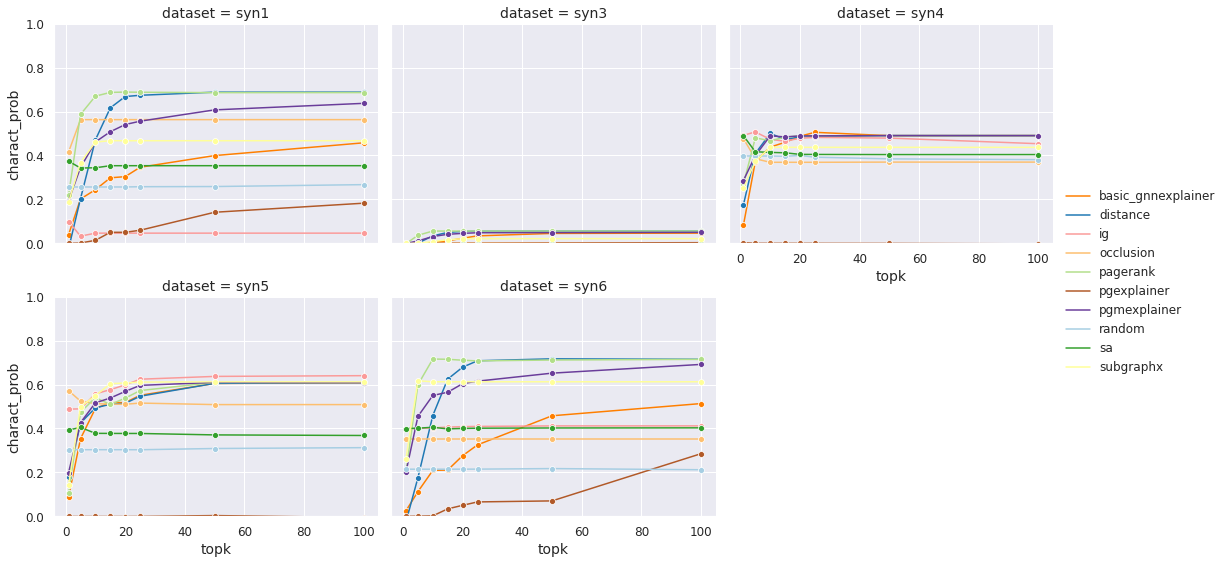

In [69]:
g = sns.FacetGrid(df_hard, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="topk", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o")
g.set(ylim=(0,1))
g.add_legend()

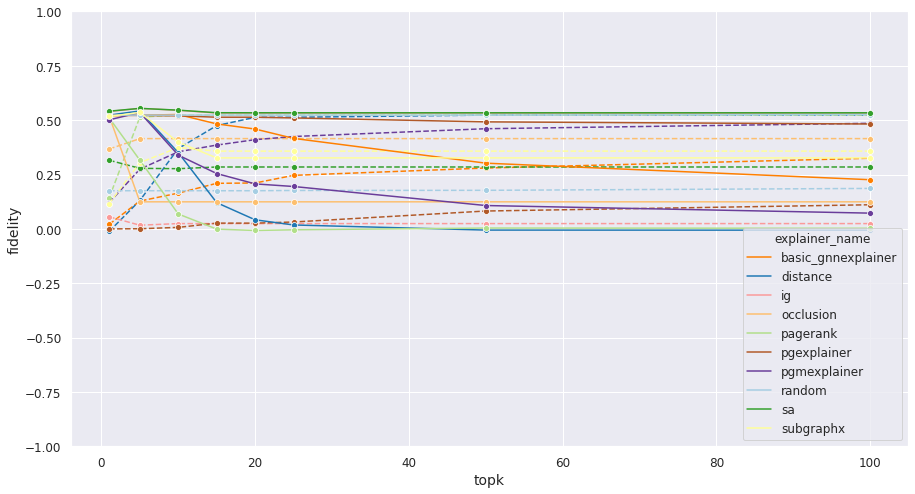

In [70]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="syn1"],
    x="topk", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="syn1"],
    x="topk", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.ylim(-1,1)
plt.ylabel('fidelity')
plt.show()

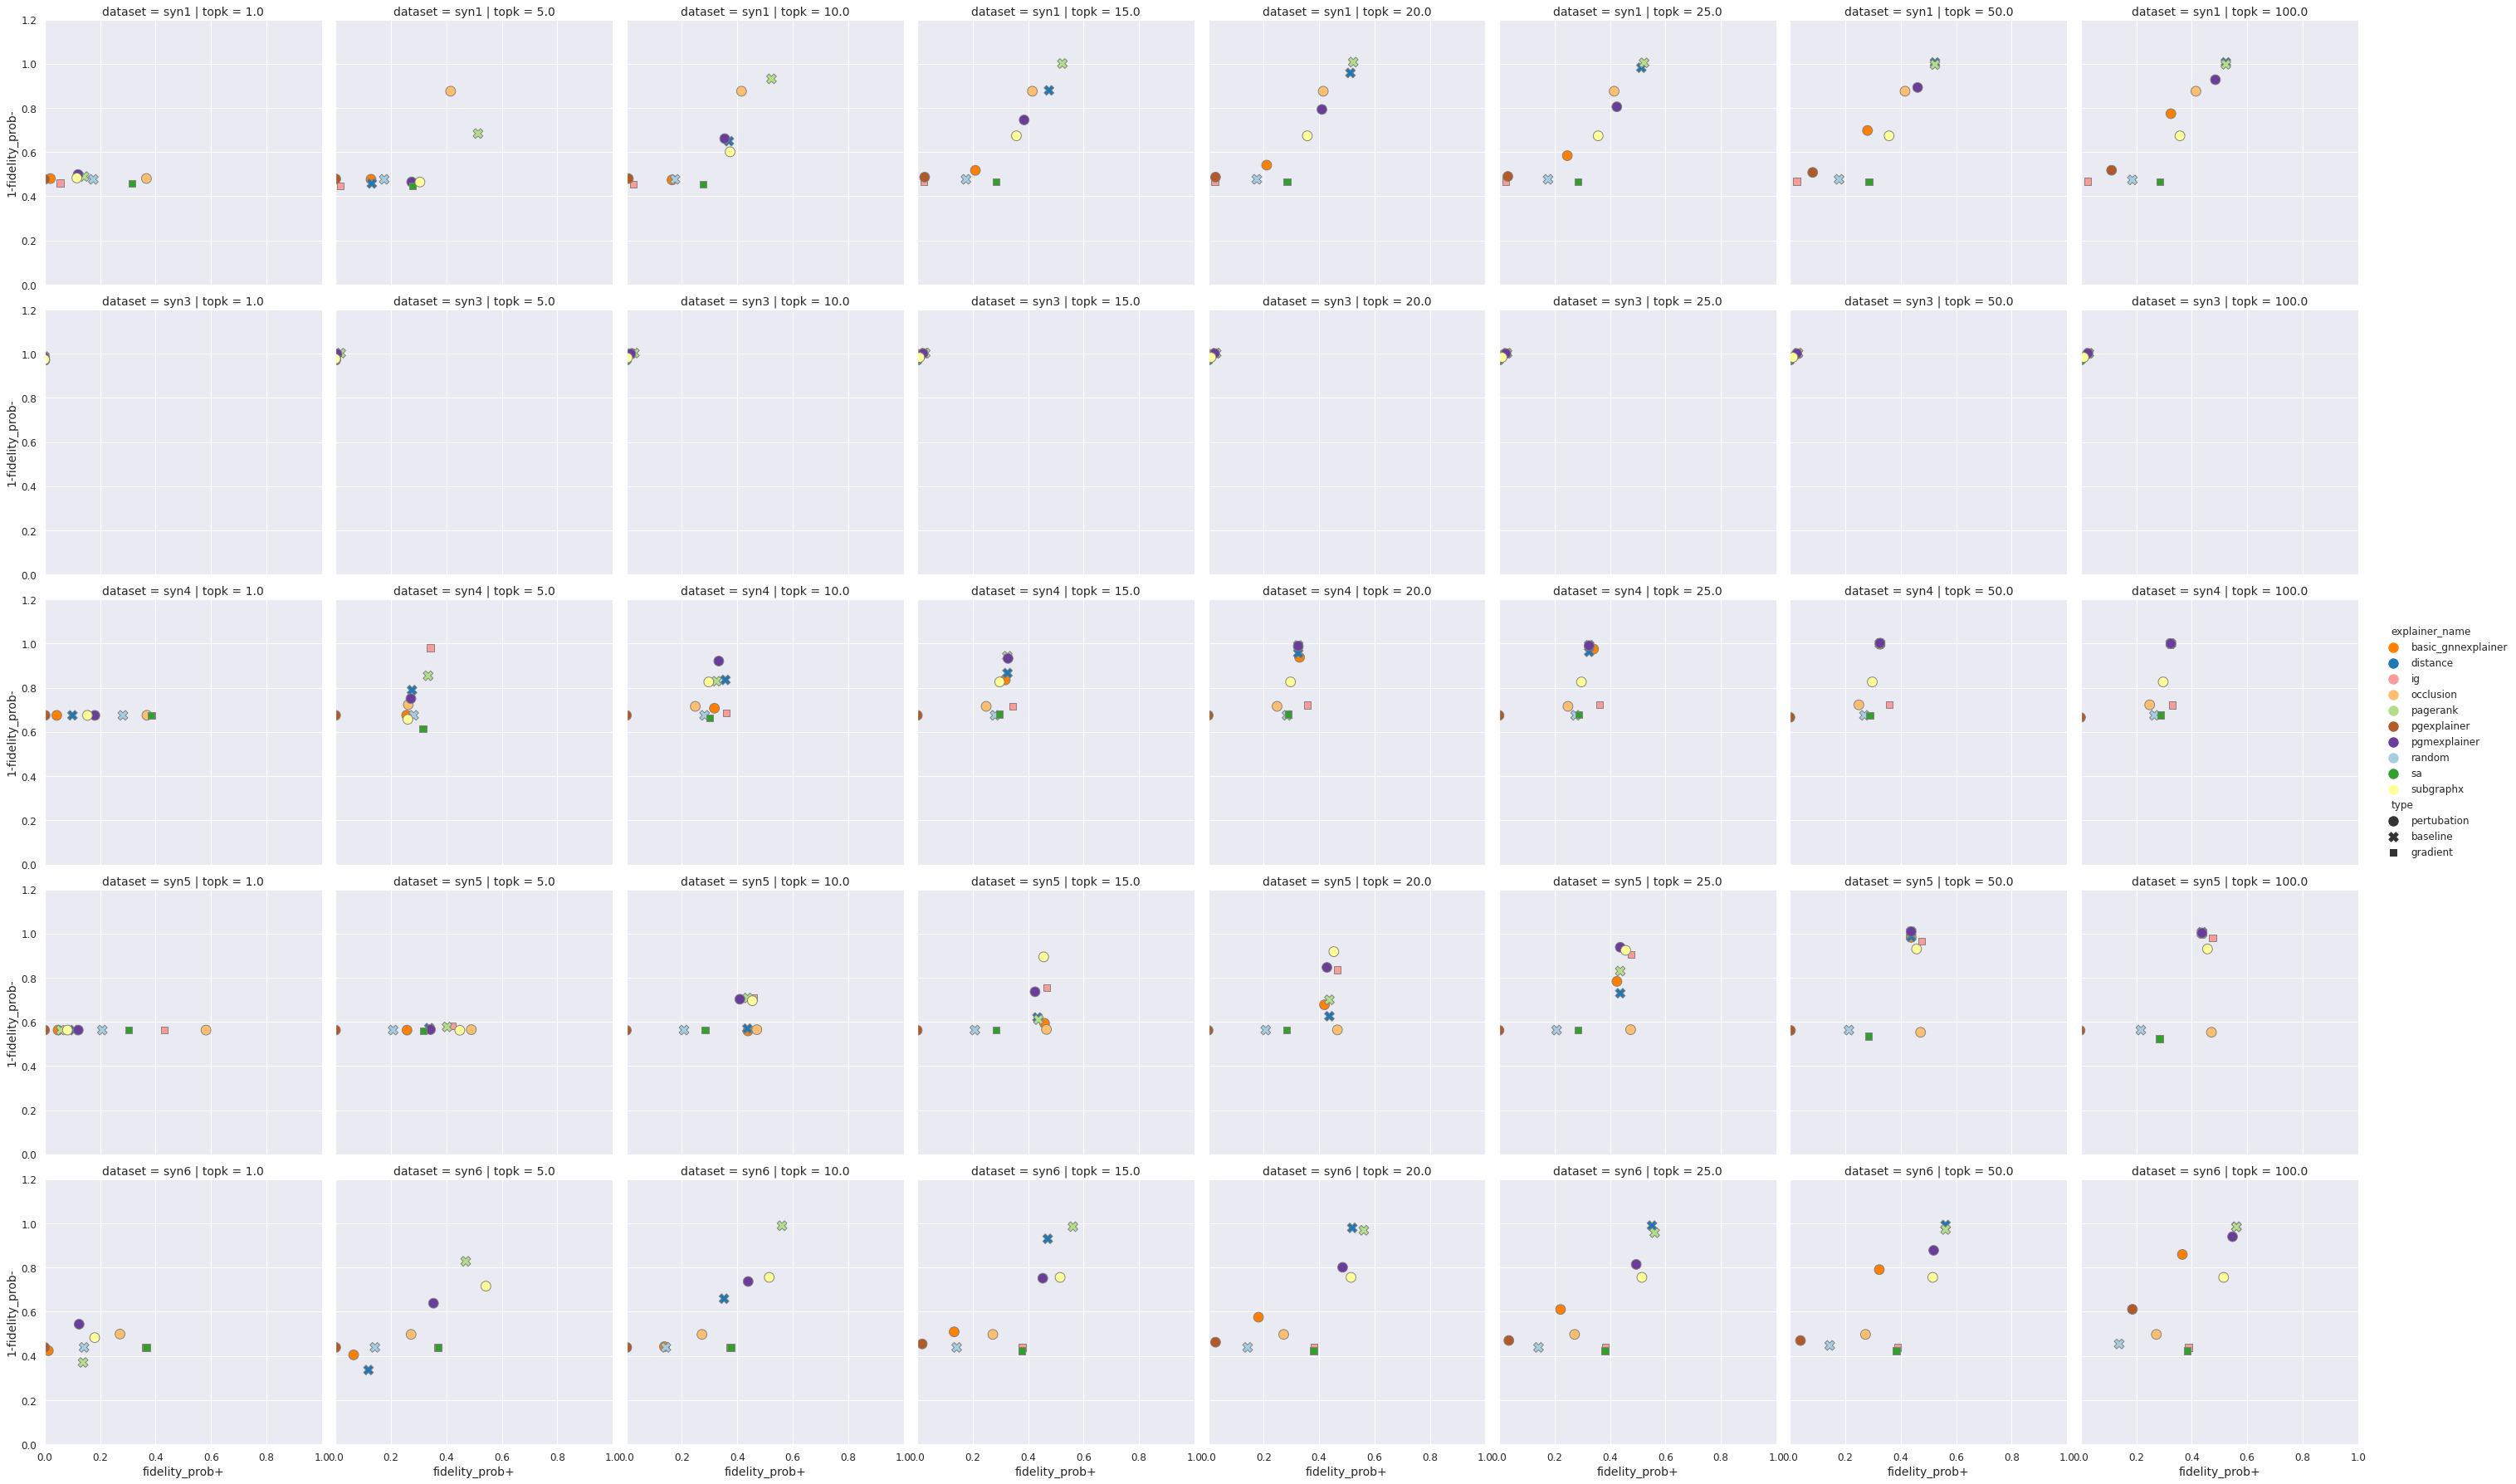

In [71]:
#### Fidelity Prob VS datasets & sparsity ####
g = sns.relplot(
    data=df_hard,
    x="fidelity_prob+", y="1-fidelity_prob-", col="topk", row="dataset", 
    hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
)
plt.xlim(0, 1)
plt.ylim(0, 1.2)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 
    

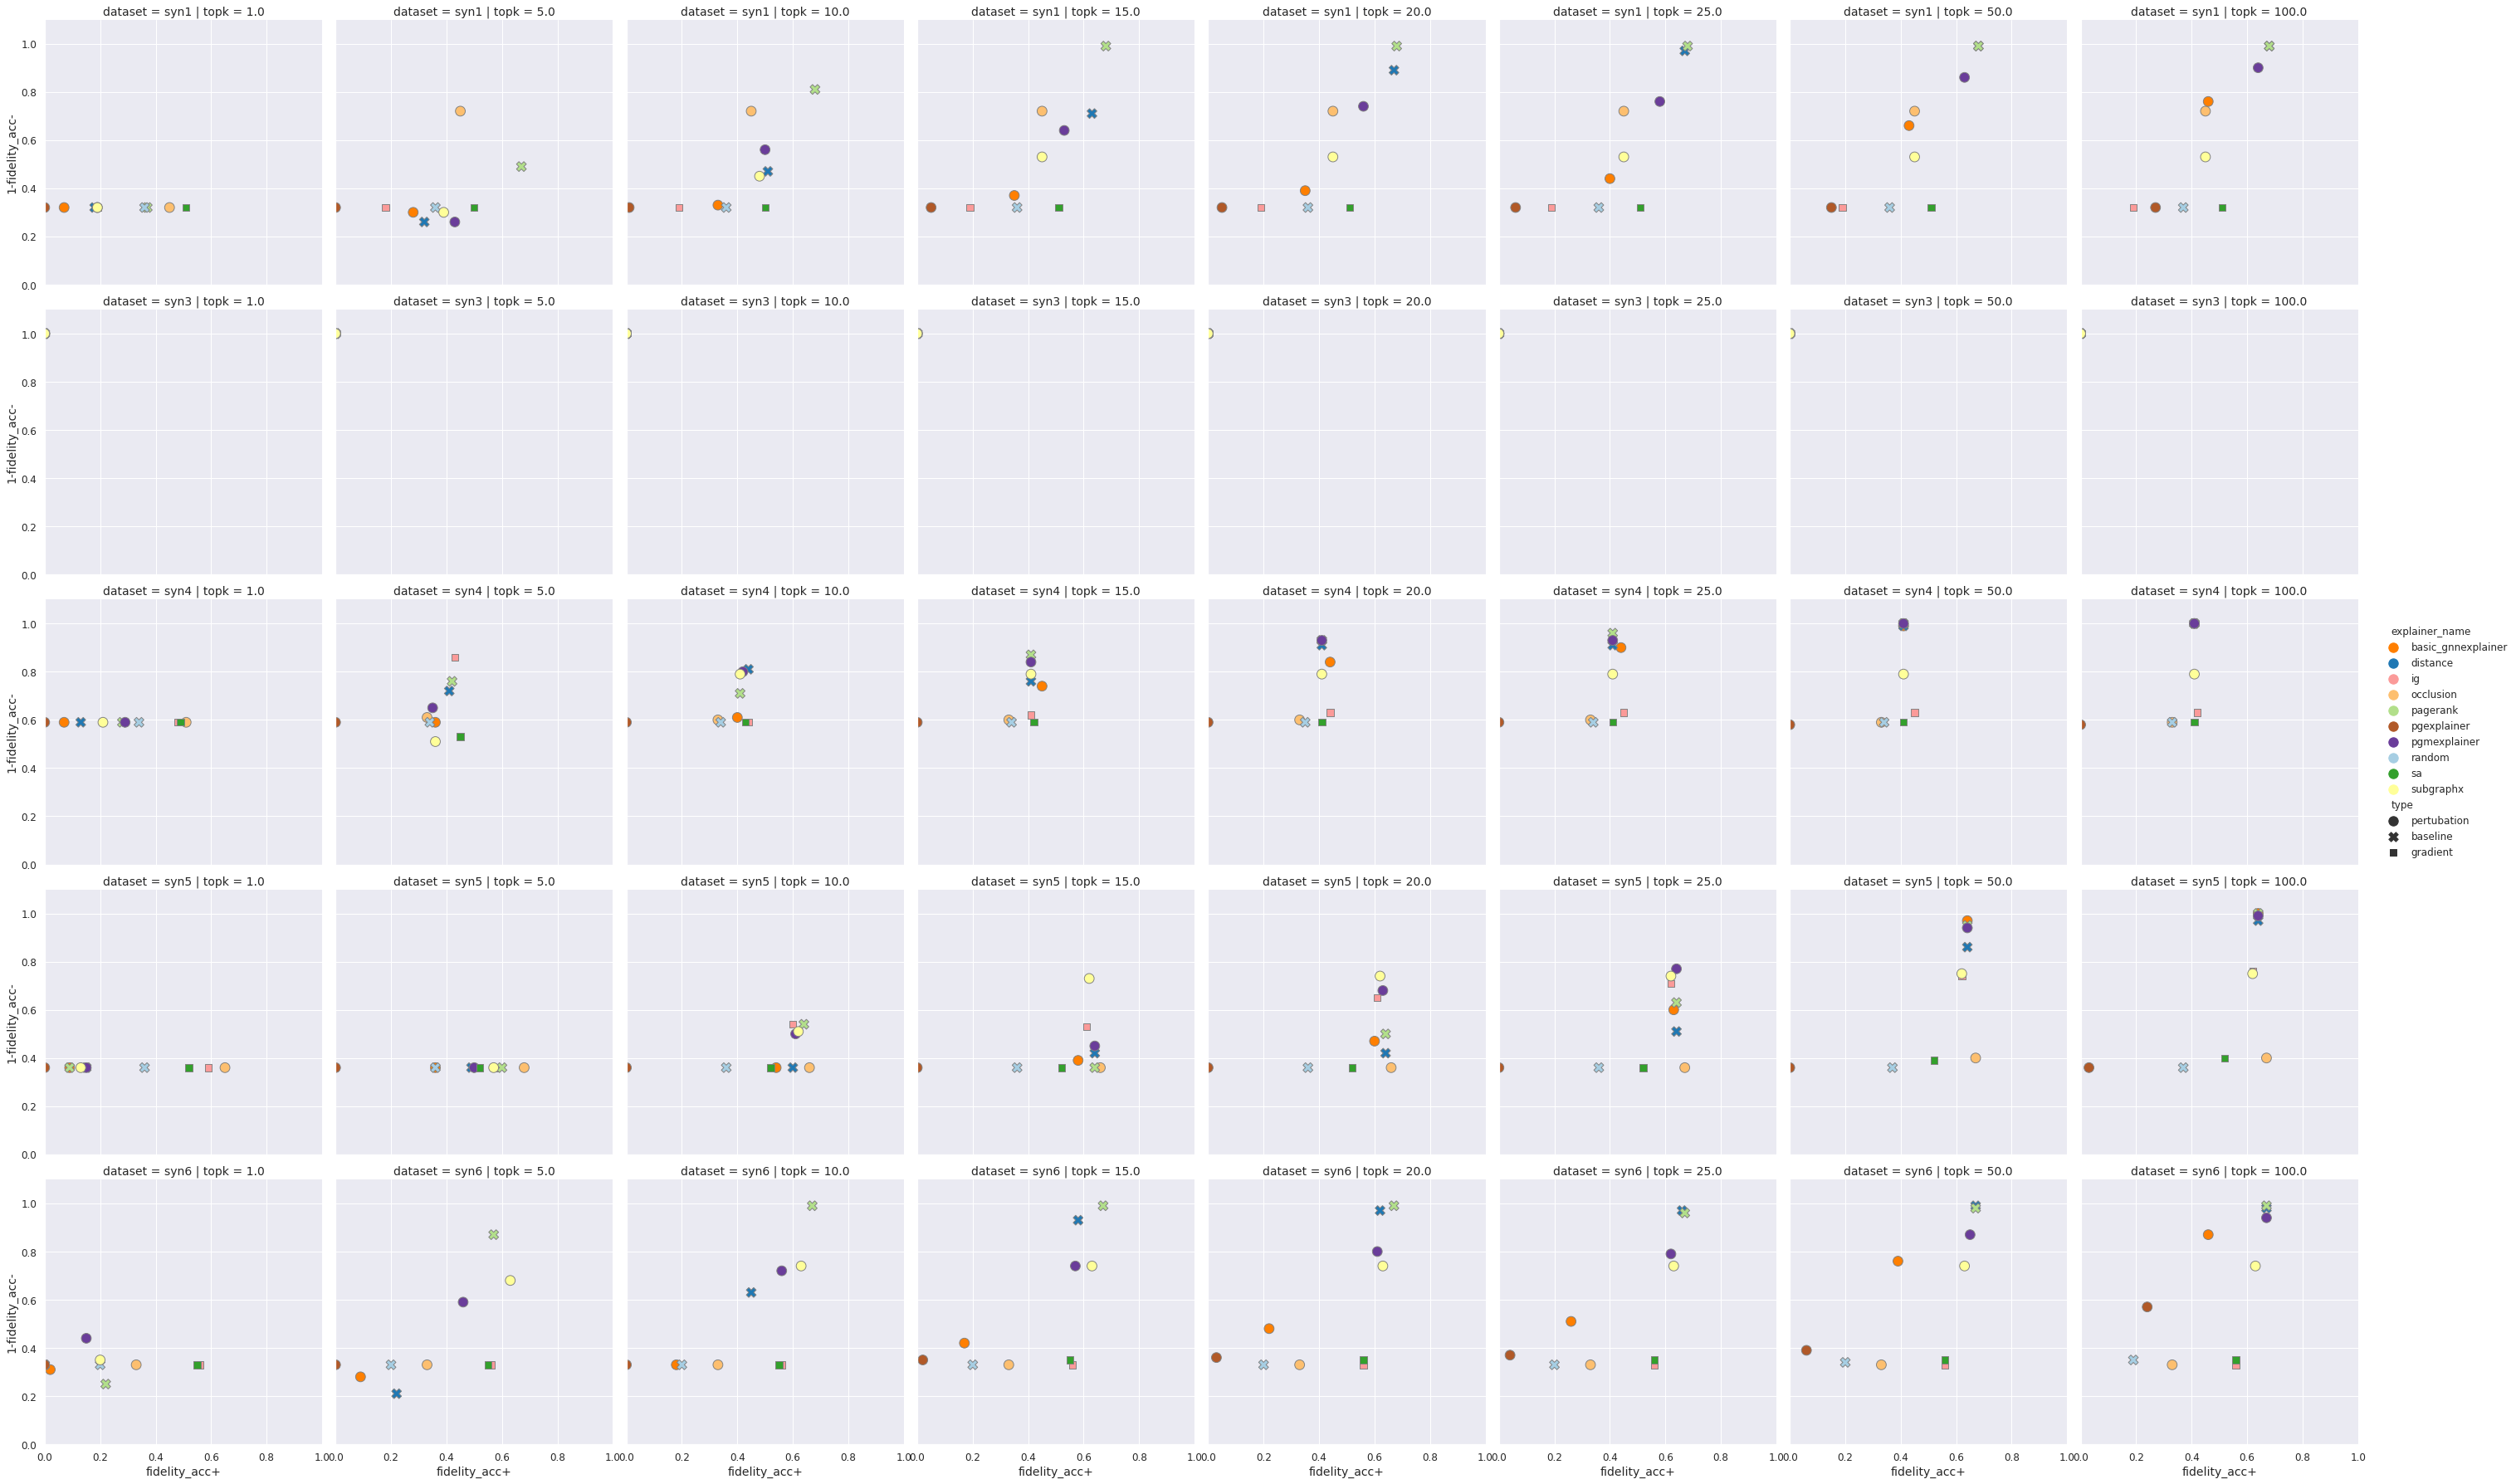

In [72]:
#### Fidelity Acc VS datasets & sparsity ####
g = sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 


## Soft mask

In [73]:
df_soft = df[df.hard_mask==False]

In [74]:
df0 = df_soft.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.topk==10]
res_init = df0s[['dataset', 'explainer_name', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()

#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset                 syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                         
pgexplainer         0.020163 -0.000064 -0.000098 -0.000387  0.033522   
random              0.256444 -0.004990  0.414227  0.303354  0.214515   
distance            0.283780 -0.003603  0.372409  0.390058  0.159159   
basic_gnnexplainer  0.238197  0.000021  0.407821  0.419708  0.248719   
ig                  0.093559 -0.004548  0.481408  0.554260  0.401760   
sa                  0.365312 -0.005230  0.406263  0.383125  0.404335   
occlusion           0.562989  0.000000  0.435910  0.532501  0.352127   
pgmexplainer        0.449181  0.004112  0.486424  0.518863  0.545647   
subgraphx           0.461147  0.007717  0.436958  0.542952  0.612720   
pagerank            0.627653  0.024369  0.480401  0.552459  0.706719   

dataset             mean_charact  
explainer_name                    
pgexplainer             0.010627  
random                  0.236710  
distance                0.240360  
basic_gnnexplainer      0.262893  
ig                      0.305288  
sa                      0.310761  
occlusion               0.376706  
pgmexplainer            0.400846  
subgraphx               0.412299  
pagerank                0.478320

In [75]:
#### Average characterization power for syn1 according to sparsity ####
df0 = df_soft.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
res_init = df0[['dataset', 'explainer_name', 'topk', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
res_init.groupby(by=['dataset', 'explainer_name', 'topk']).mean()

df_char_syn1 = pd.pivot_table(res_init[res_init.dataset=="syn1"], values='charact_prob', index=['explainer_name'], columns='topk')
df_char_syn1['mean_charact'] = df_char_syn1.mean(axis=1)
df_char_syn1.sort_values(by=['mean_charact'])


topk                     1.0       5.0      10.0      15.0      20.0  \
explainer_name                                                         
pgexplainer        -0.000329 -0.004587  0.020163  0.021070  0.038592   
ig                  0.098826  0.083059  0.093559  0.093613  0.093682   
basic_gnnexplainer  0.037610  0.177183  0.238197  0.251571  0.265868   
distance           -0.024403  0.030971  0.283780  0.346219  0.362080   
random              0.256445  0.256445  0.256444  0.256444  0.256443   
sa                  0.373957  0.363968  0.365312  0.370468  0.370479   
subgraphx           0.187141  0.367740  0.461147  0.467114  0.467114   
pgmexplainer        0.193991  0.342304  0.449181  0.498840  0.532030   
occlusion           0.416186  0.562989  0.562989  0.562989  0.562989   
pagerank            0.220516  0.564682  0.627653  0.641342  0.643372   

topk                    25.0      50.0     100.0  mean_charact  
explainer_name                                                  
pgexplainer         0.046607  0.097105  0.118345      0.042121  
ig                  0.093879  0.094033  0.094038      0.093086  
basic_gnnexplainer  0.276309  0.297691  0.338398      0.235353  
distance            0.357026  0.349800  0.341585      0.255882  
random              0.257654  0.258437  0.266823      0.258142  
sa                  0.370480  0.370605  0.370606      0.369484  
subgraphx           0.467114  0.467114  0.467114      0.418950  
pgmexplainer        0.546681  0.599705  0.626874      0.473701  
occlusion           0.562989  0.562989  0.562989      0.544639  
pagerank            0.644789  0.646169  0.646238      0.579345

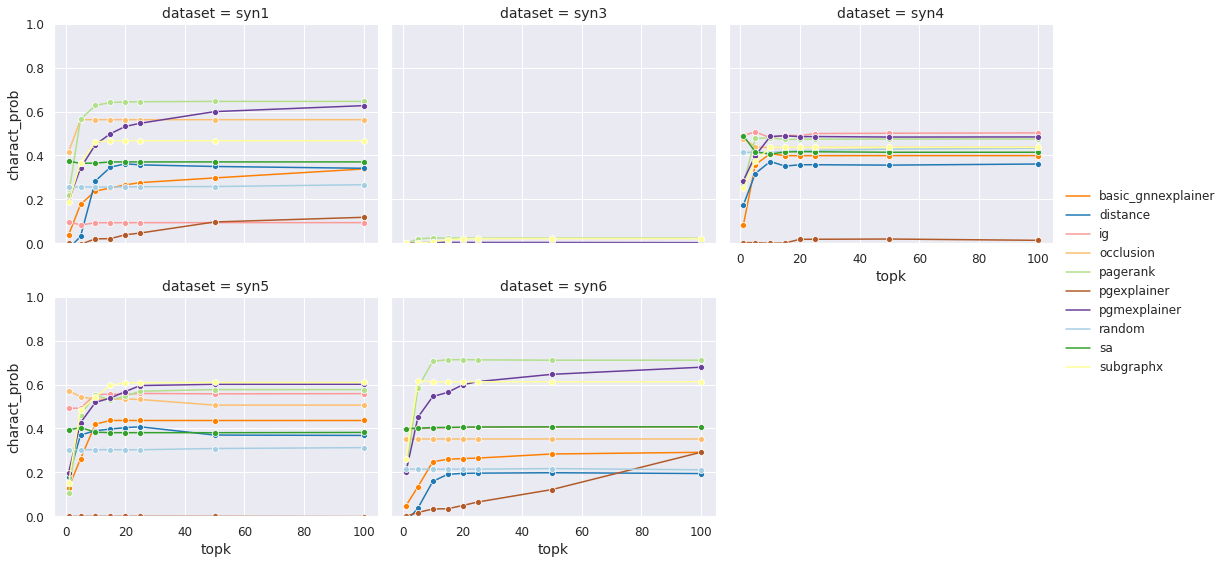

In [76]:
g = sns.FacetGrid(df_soft, col="dataset", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.lineplot, x="topk", y="charact_prob",
    hue="explainer_name", palette=dict_color, marker="o")
g.set(ylim=(0,1))
g.add_legend()

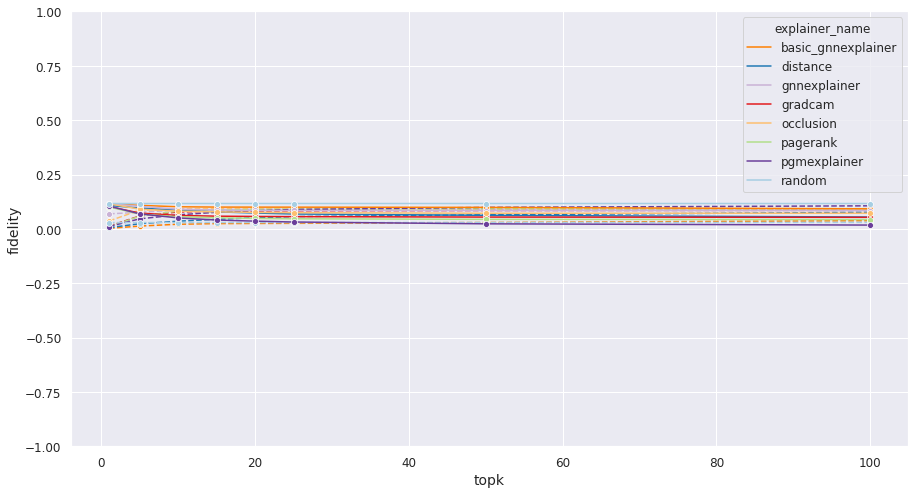

In [159]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="syn1"],
    x="topk", y="fidelity_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="syn1"],
    x="topk", y="fidelity_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.ylim(-1,1)
plt.ylabel('fidelity')
plt.show()

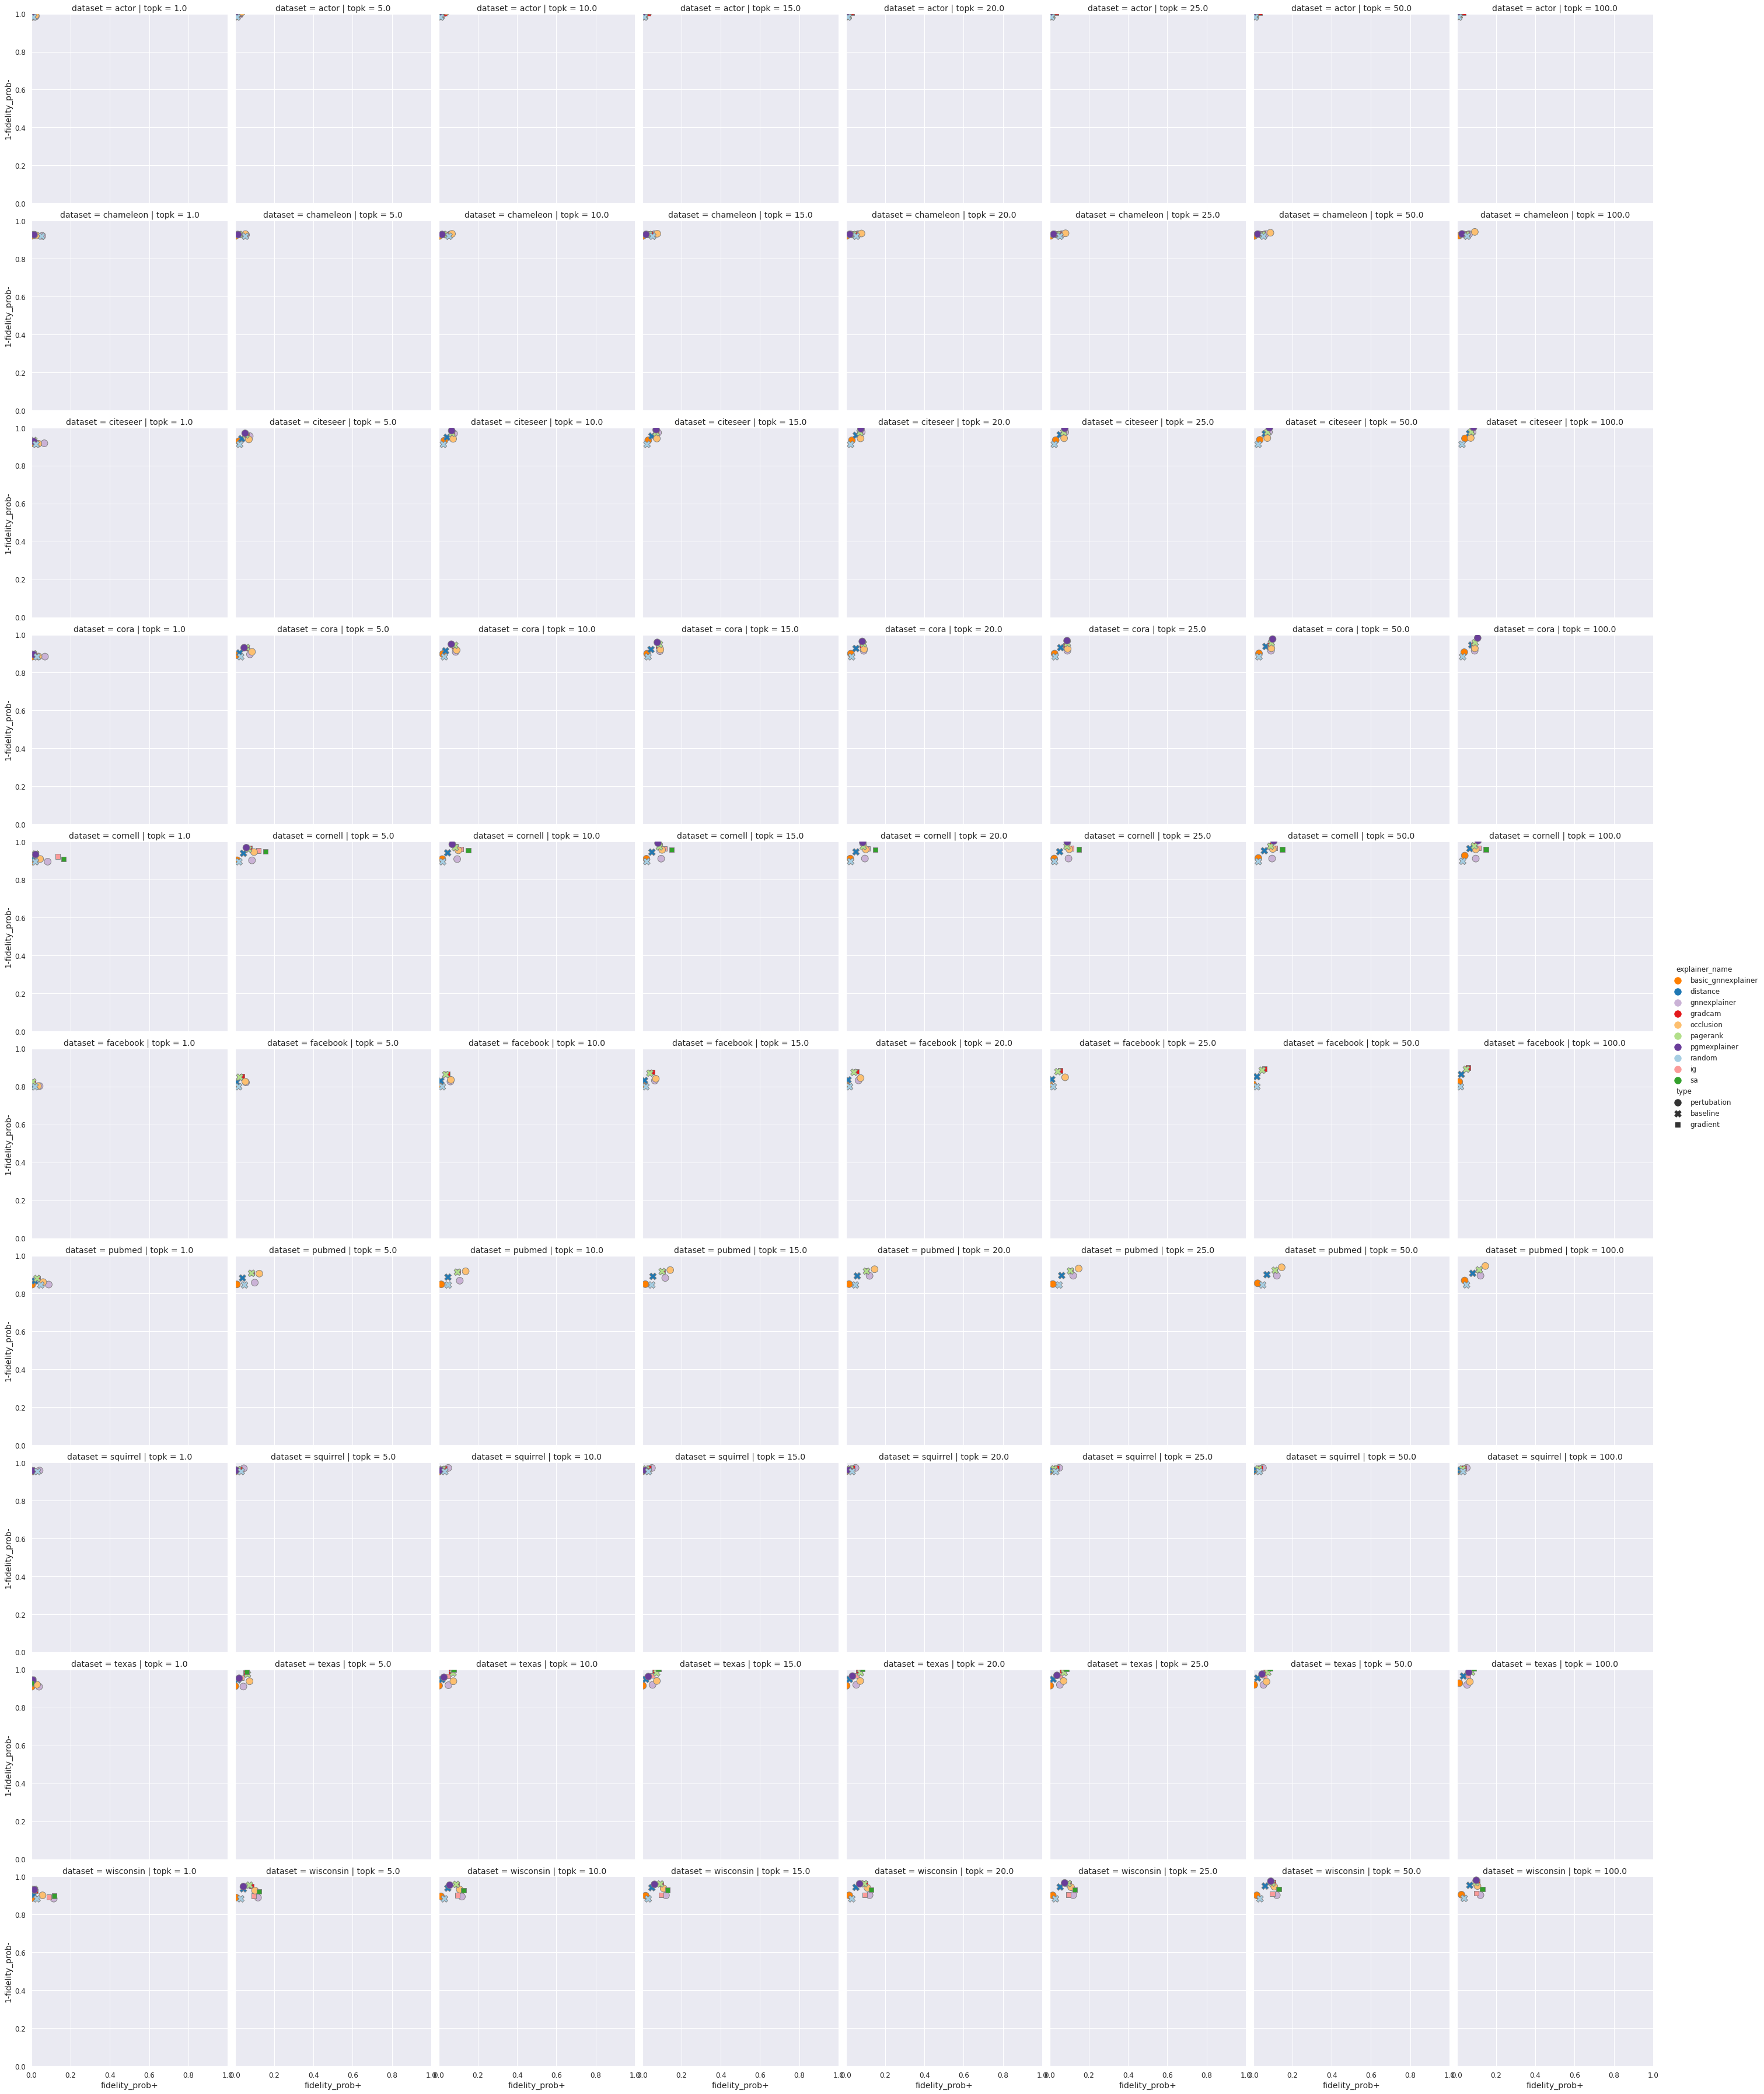

In [160]:
#### Fidelity Prob VS datasets & topk ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

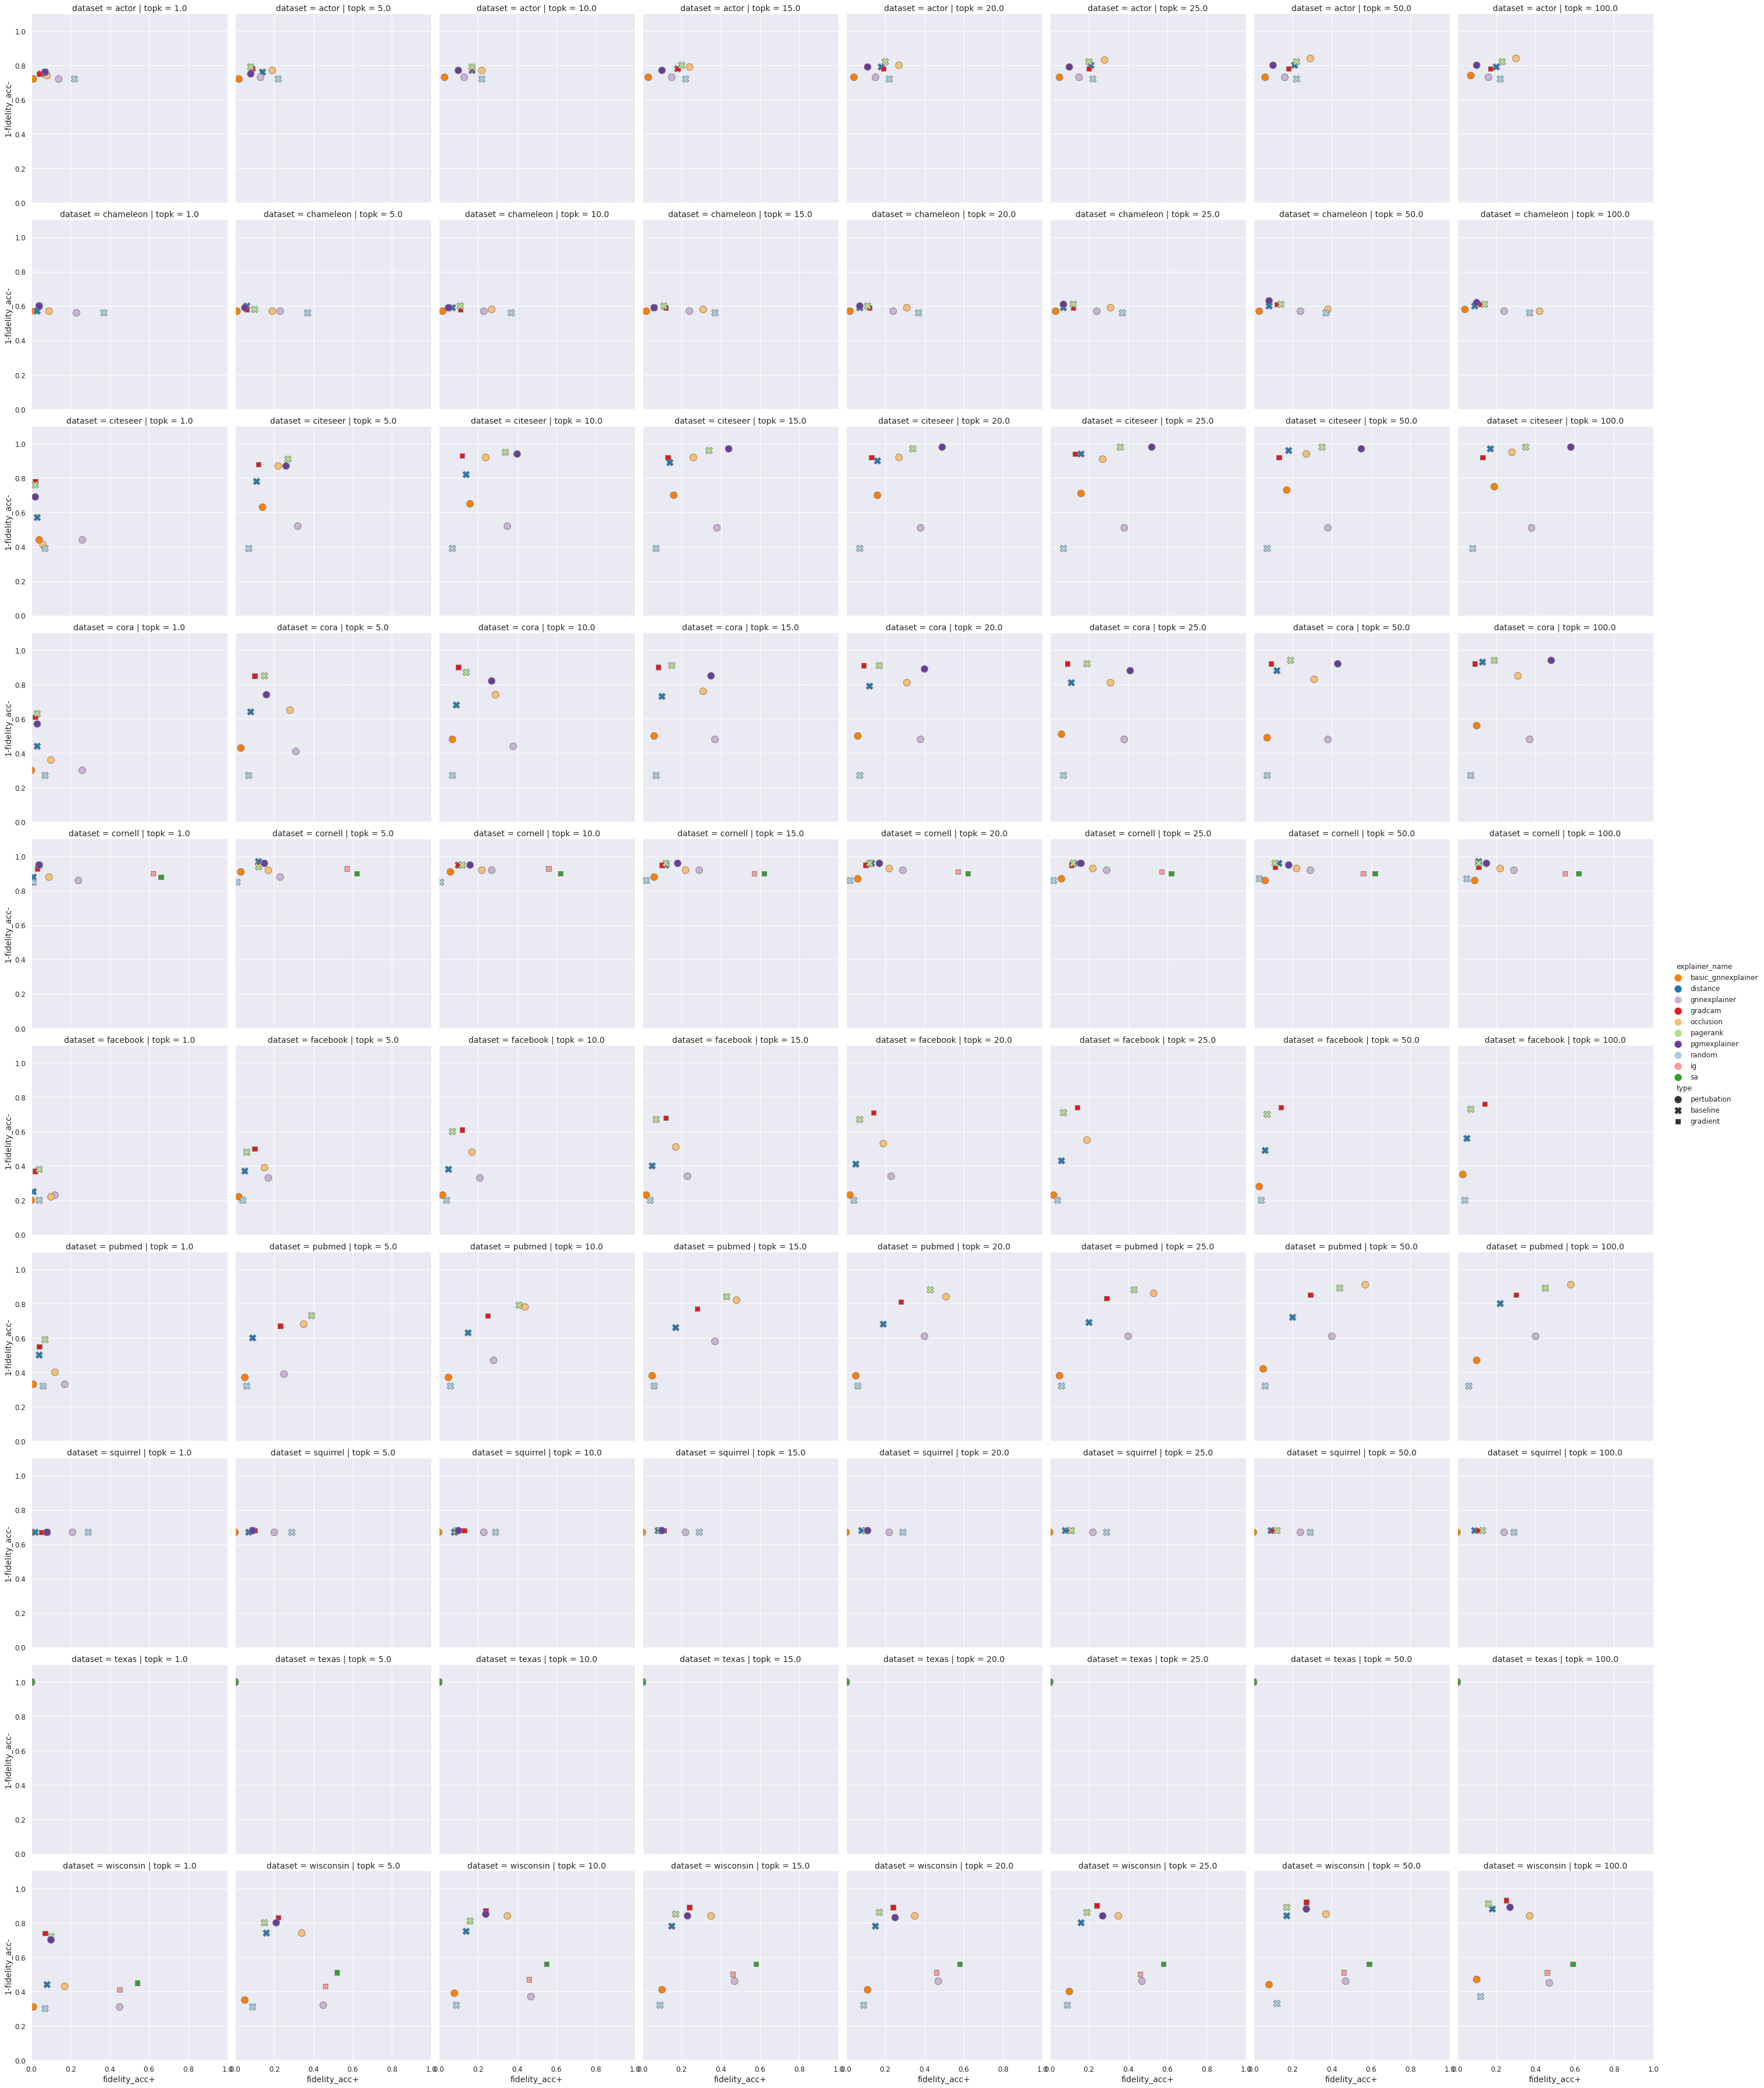

In [161]:
#### Fidelity Acc VS datasets & topk ####
g = sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Explain focus: GNN model

true_label_as_target = False

In [77]:
df_gnn = df_res[df_res['true_label_as_target']==False].reset_index()

In [78]:
df_gnn

index dataset  true_label_as_target  hard_mask   topk  \
0        0    syn1                 False      False    1.0   
1        1    syn1                 False      False    1.0   
2        2    syn1                 False      False    1.0   
3        3    syn1                 False      False    1.0   
4        4    syn1                 False      False    1.0   
..     ...     ...                   ...        ...    ...   
795   1435    syn6                 False       True  100.0   
796   1436    syn6                 False       True  100.0   
797   1437    syn6                 False       True  100.0   
798   1438    syn6                 False       True  100.0   
799   1439    syn6                 False       True  100.0   

         explainer_name  num_test  fidelity_acc+  fidelity_acc-  \
0    basic_gnnexplainer     100.0           0.06           -1.0   
1              distance     100.0           0.18           -1.0   
2                    ig     100.0           0.19           -1.0   
3             occlusion     100.0           0.45           -1.0   
4              pagerank     100.0           0.37           -1.0   
..                  ...       ...            ...            ...   
795         pgexplainer     100.0           0.22           -1.0   
796        pgmexplainer     100.0           0.67           -1.0   
797              random     100.0           0.19           -1.0   
798                  sa     100.0           0.56           -1.0   
799           subgraphx     100.0           0.65           -1.0   

     fidelity_prob+  ...  number_of_edges         type  1-fidelity_acc-  \
0          0.038366  ...           4110.0  pertubation             0.32   
1          0.099428  ...           4110.0     baseline             0.32   
2          0.163980  ...           4110.0     gradient             0.32   
3          0.367080  ...           4110.0  pertubation             0.32   
4          0.233193  ...           4110.0     baseline             0.32   
..              ...  ...              ...          ...              ...   
795        0.191489  ...           3948.0  pertubation             0.55   
796        0.623608  ...           3948.0  pertubation             0.94   
797        0.202224  ...           3948.0     baseline             0.35   
798        0.475854  ...           3948.0     gradient             0.33   
799        0.562651  ...           3948.0  pertubation             0.74   

     1-fidelity_prob-  charact_prob  charact_acc  1-fidelity_gnn_acc-  \
0            0.438530      0.070559     0.101053                 0.32   
1            0.442950      0.162402     0.230400                 0.32   
2            0.426547      0.236891     0.238431                 0.32   
3            0.446576      0.402944     0.374026                 0.32   
4            0.412311      0.297901     0.343188                 0.32   
..                ...           ...          ...                  ...   
795          0.534795      0.282004     0.314286                 0.55   
796          0.907207      0.739138     0.782360                 0.94   
797          0.378751      0.263669     0.246296                 0.35   
798          0.362194      0.411317     0.415281                 0.33   
799          0.714923      0.629713     0.692086                 0.74   

     1-fidelity_gnn_prob-  charact_gnn_prob  charact_gnn_acc  
0                0.438530          0.070559         0.101053  
1                0.442950          0.162402         0.230400  
2                0.426547          0.236891         0.238431  
3                0.446576          0.402944         0.374026  
4                0.412311          0.297901         0.343188  
..                    ...               ...              ...  
795              0.534795          0.282004         0.314286  
796              0.907207          0.739138         0.782360  
797              0.378751          0.263669         0.246296  
798              0.362194          0.411317    

## Hard mask

In [79]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==True]

In [80]:
df0 = df_gnn_hard.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df0s = df0[df0.topk==10]
res_init = df0s[['dataset', 'explainer_name', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for topk=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_gnn_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact_gnn_prob'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact_gnn_prob'])

dataset                 syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                         
pgexplainer         0.018713  0.000129  0.000098  0.000042  0.032485   
random              0.311589  0.004965  0.428936  0.383959  0.262020   
basic_gnnexplainer  0.348659  0.007892  0.475822  0.421134  0.259794   
sa                  0.378830  0.005202  0.468473  0.412358  0.406654   
ig                  0.202022  0.004586  0.504155  0.568851  0.403608   
occlusion           0.542148  0.000000  0.430719  0.476481  0.342272   
distance            0.490035  0.038999  0.567776  0.484317  0.507239   
subgraphx           0.467533  0.009904  0.537580  0.540045  0.629713   
pgmexplainer        0.488575  0.034178  0.568922  0.548550  0.580384   
pagerank            0.679469  0.055781  0.555331  0.573036  0.754870   

dataset             mean_charact_gnn_prob  
explainer_name                             
pgexplainer                      0.010293  
random                           0.278294  
basic_gnnexplainer               0.302660  
sa                               0.334303  
ig                               0.336645  
occlusion                        0.358324  
distance                         0.417673  
subgraphx                        0.436955  
pgmexplainer                     0.444122  
pagerank                         0.523697

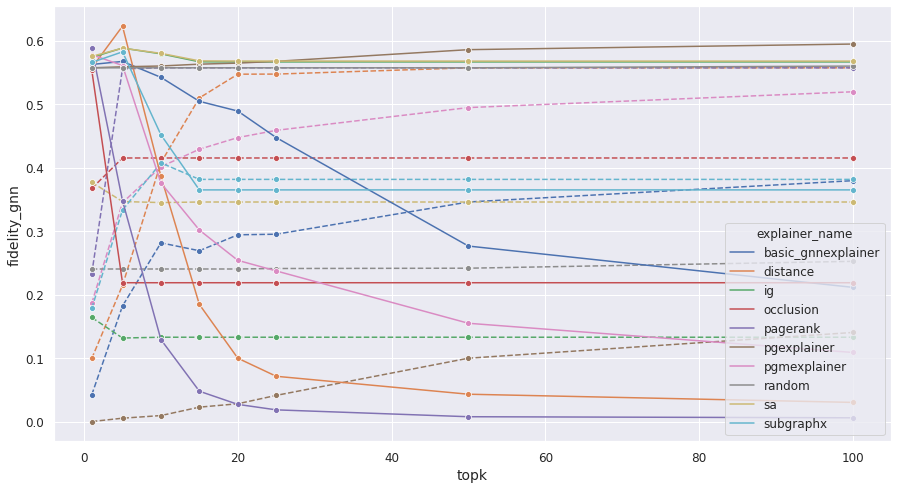

In [81]:
#### Fidelity Prob VS topk ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="syn1"],
    x="topk", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="syn1"],
    x="topk", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

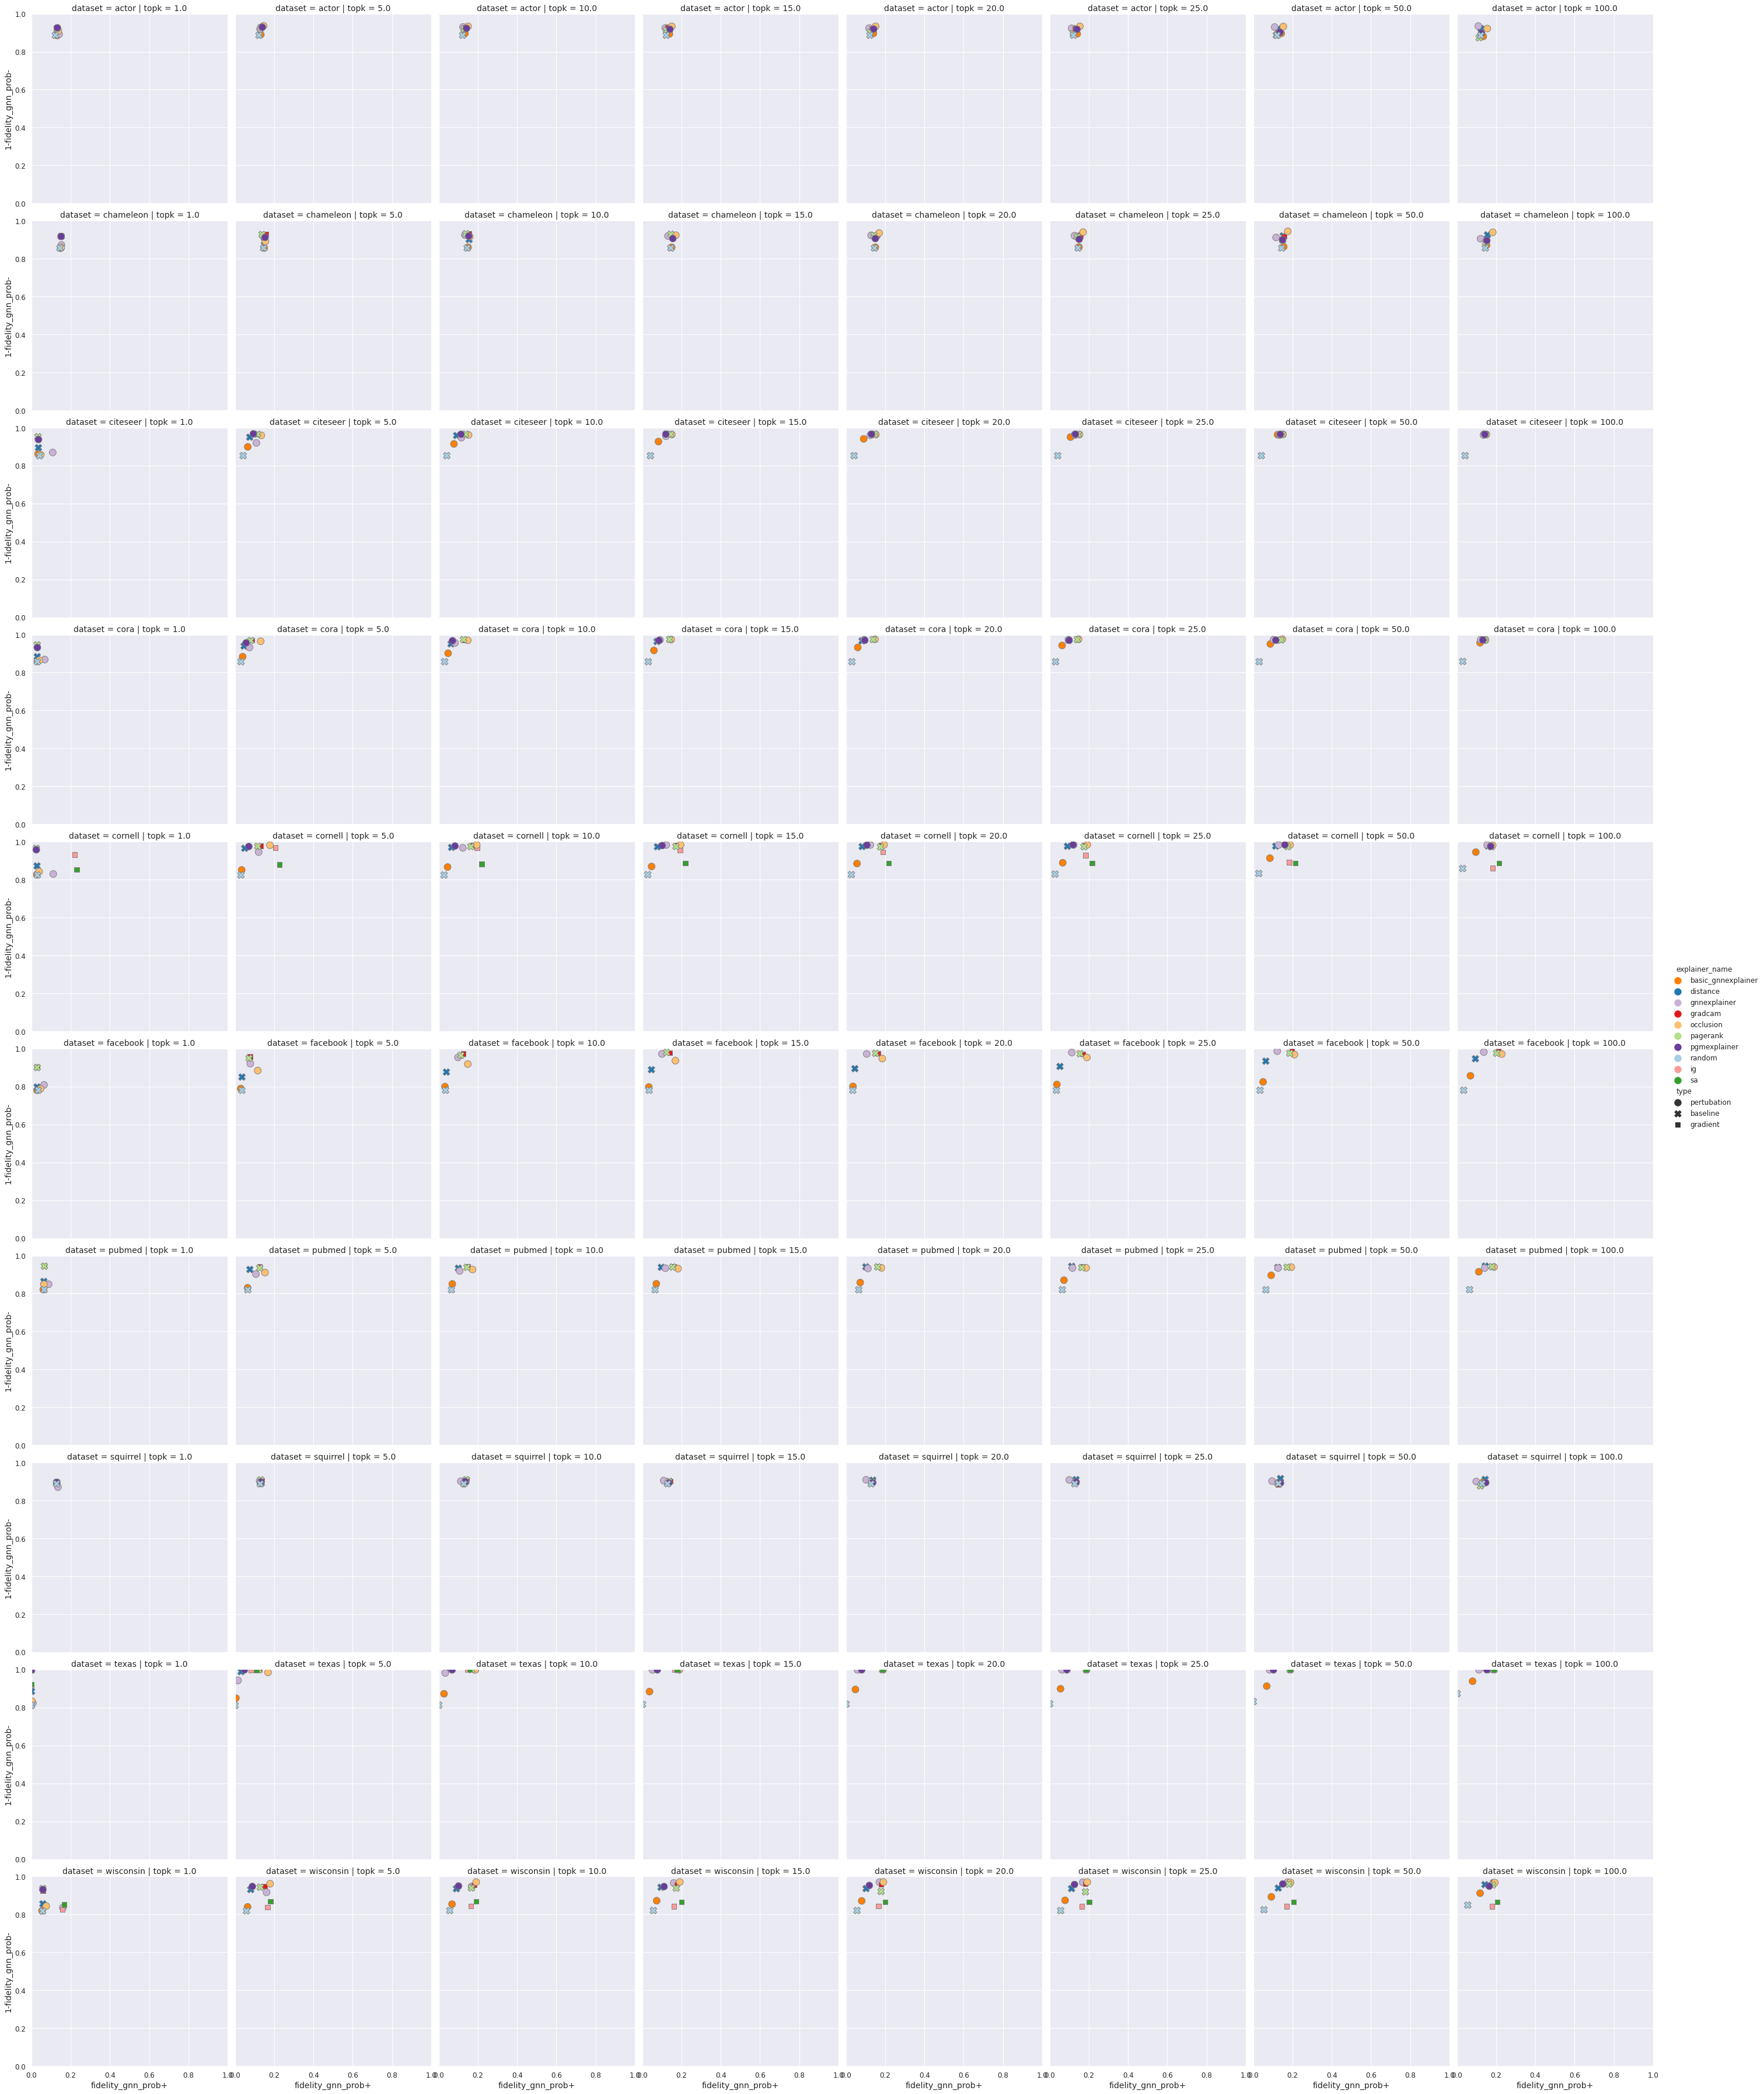

In [168]:
#### Fidelity Prob VS datasets & topk ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha = 1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

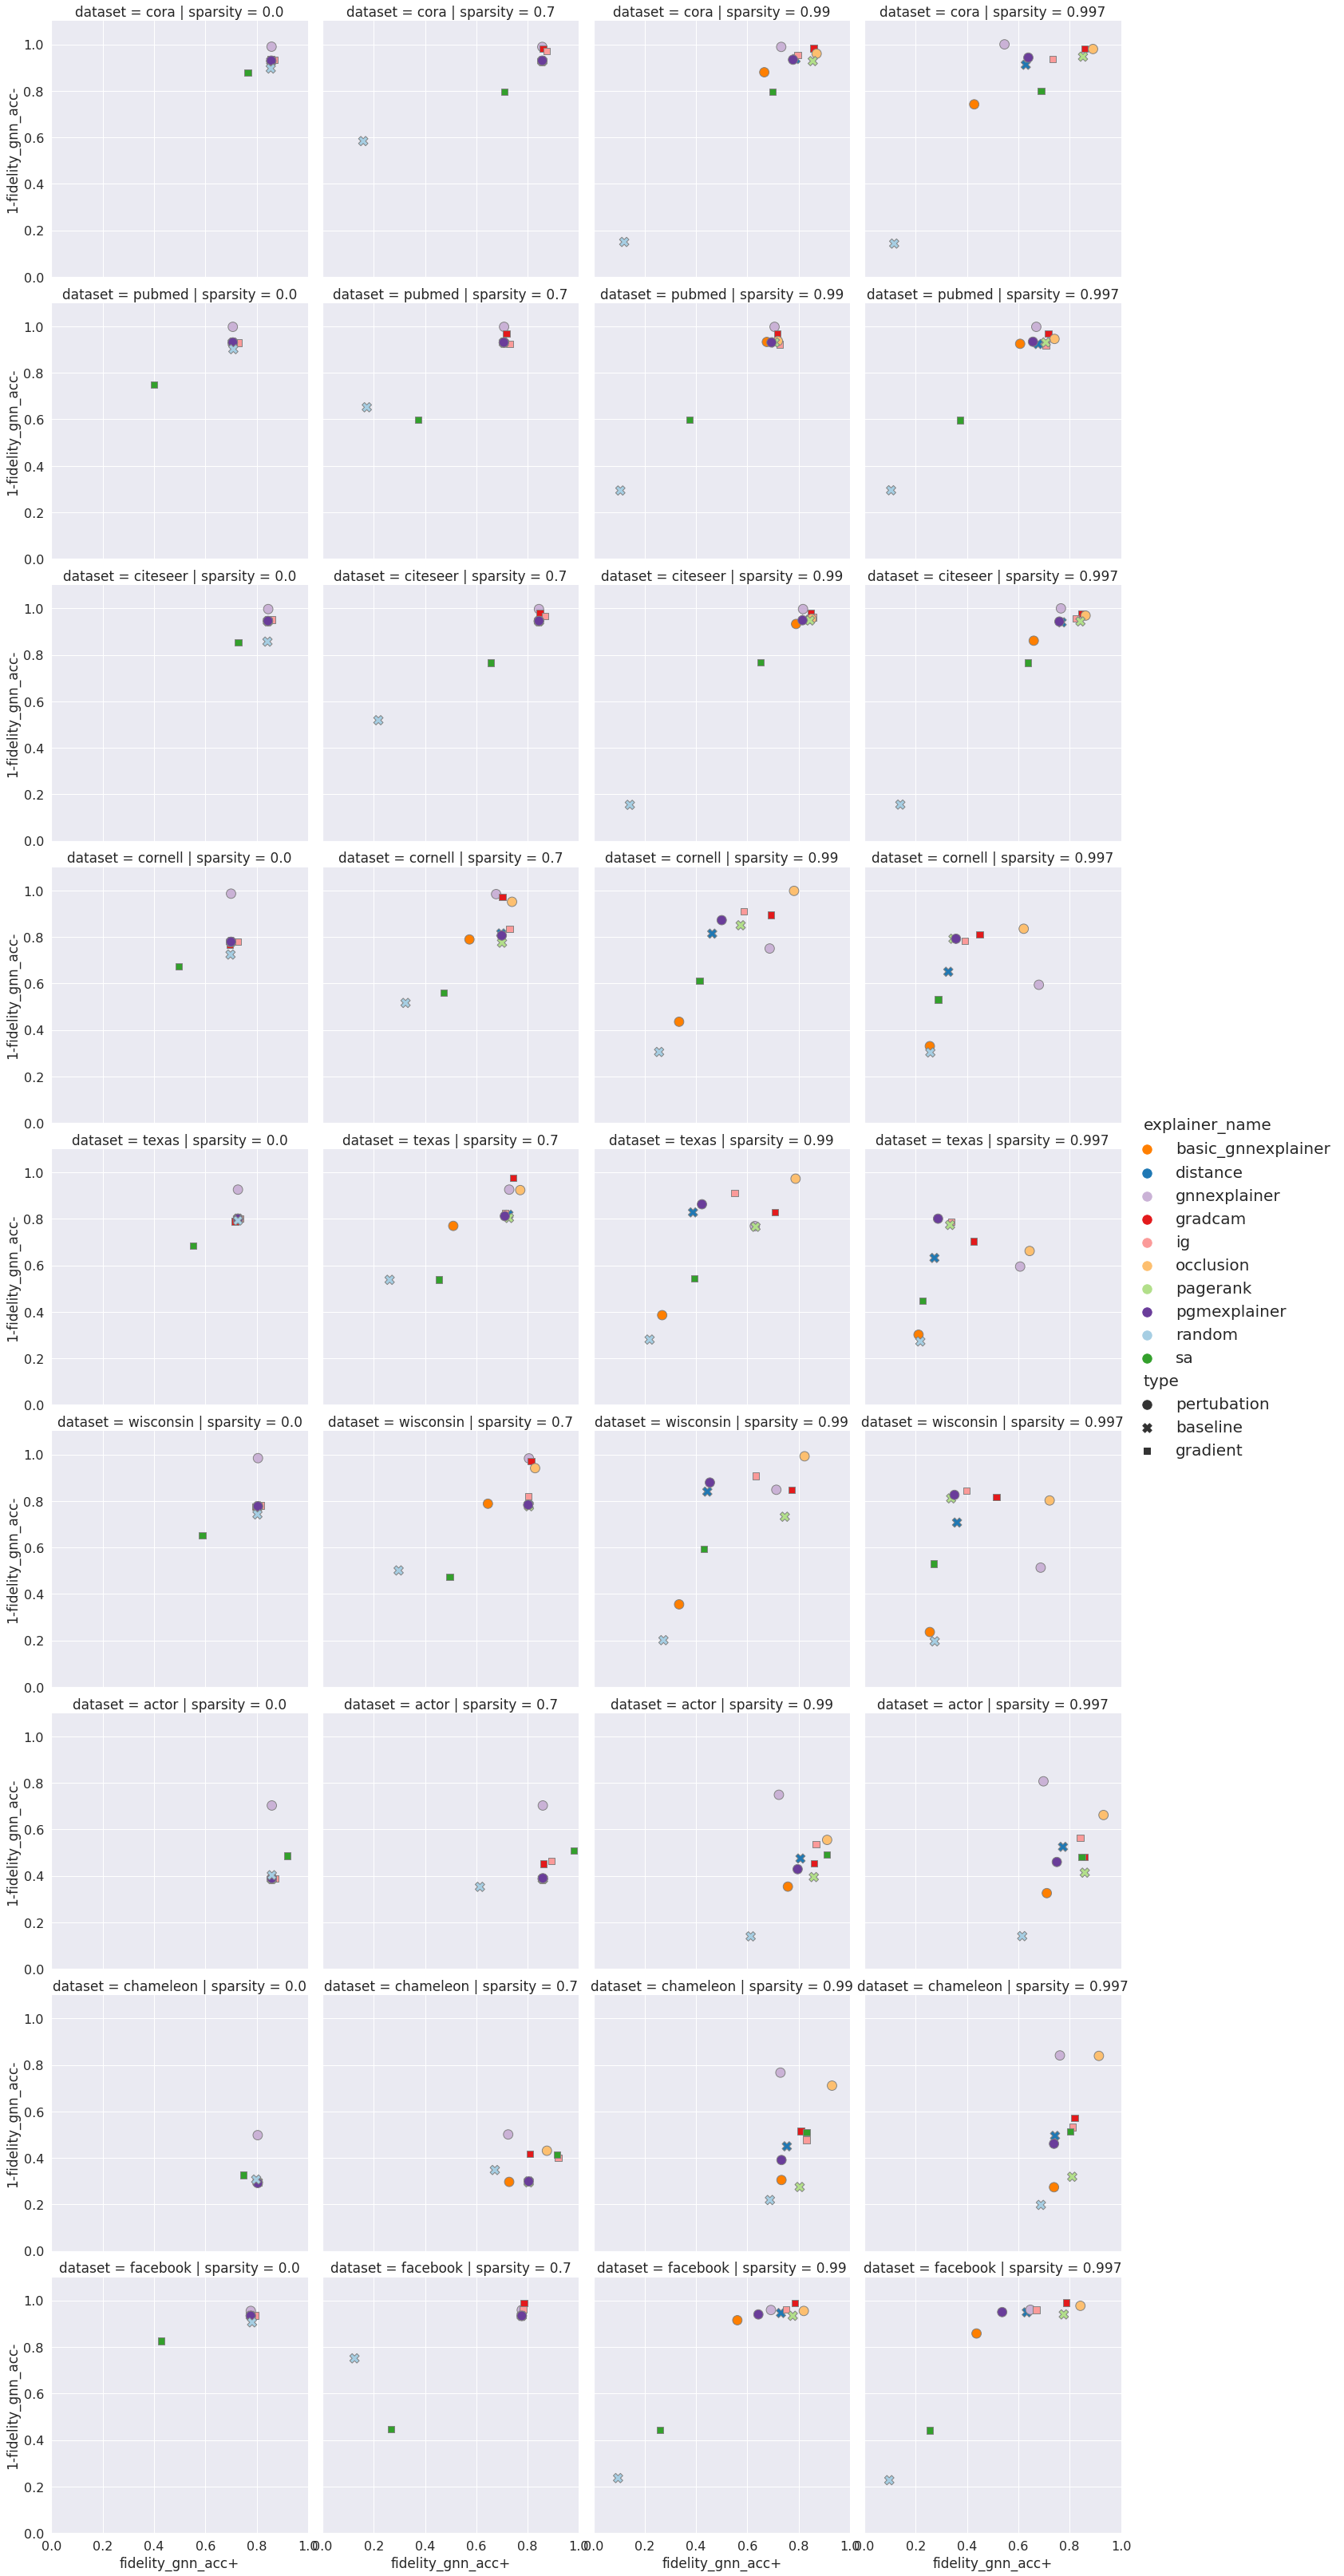

In [65]:
#### Fidelity Acc VS datasets & topk ####
g = sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

## Soft mask

In [82]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [83]:
##### Characterization #####
df1 = df_gnn_soft.groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean().reset_index()
df1s = df1[df1.topk==10]
res_init = df1s[['dataset', 'explainer_name', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()
#### Average characterization power among datasets for topk=0.7 ####
df_char = pd.pivot_table(res_init, values='charact_gnn_prob', index=['explainer_name'], columns='dataset')
df_char['mean_charact_gnn_prob'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact_gnn_prob'])

dataset                 syn1      syn3      syn4      syn5      syn6  \
explainer_name                                                         
pgexplainer         0.014222  0.000630  0.000098  0.000909  0.032678   
basic_gnnexplainer  0.249054  0.005198  0.442718  0.424930  0.240488   
random              0.311589  0.004965  0.428938  0.383959  0.262020   
distance            0.356425  0.003648  0.403449  0.388196  0.244246   
sa                  0.392025  0.005202  0.457878  0.414440  0.405947   
ig                  0.232029  0.004586  0.512860  0.557597  0.402920   
occlusion           0.541917  0.000000  0.454093  0.487307  0.342335   
pgmexplainer        0.480577  0.007614  0.563396  0.546701  0.576569   
subgraphx           0.467533  0.009904  0.537580  0.543848  0.629713   
pagerank            0.697926  0.025398  0.564839  0.576983  0.739374   

dataset             mean_charact_gnn_prob  
explainer_name                             
pgexplainer                      0.009707  
basic_gnnexplainer               0.272478  
random                           0.278294  
distance                         0.279193  
sa                               0.335098  
ig                               0.341998  
occlusion                        0.365131  
pgmexplainer                     0.434971  
subgraphx                        0.437716  
pagerank                         0.520904

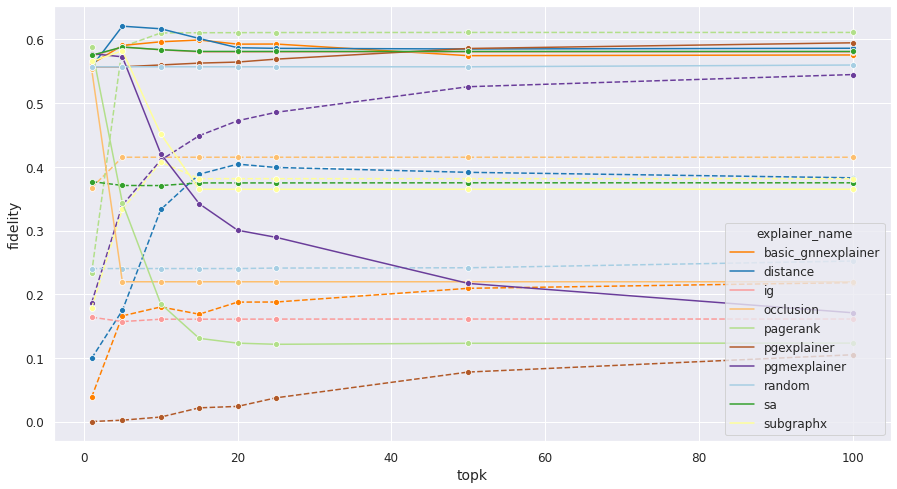

In [84]:
#### Fidelity Prob VS topk ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="syn1"],
    x="topk", y="fidelity_gnn_prob+",
    hue="explainer_name", palette=dict_color, marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="syn1"],
    x="topk", y="fidelity_gnn_prob-",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

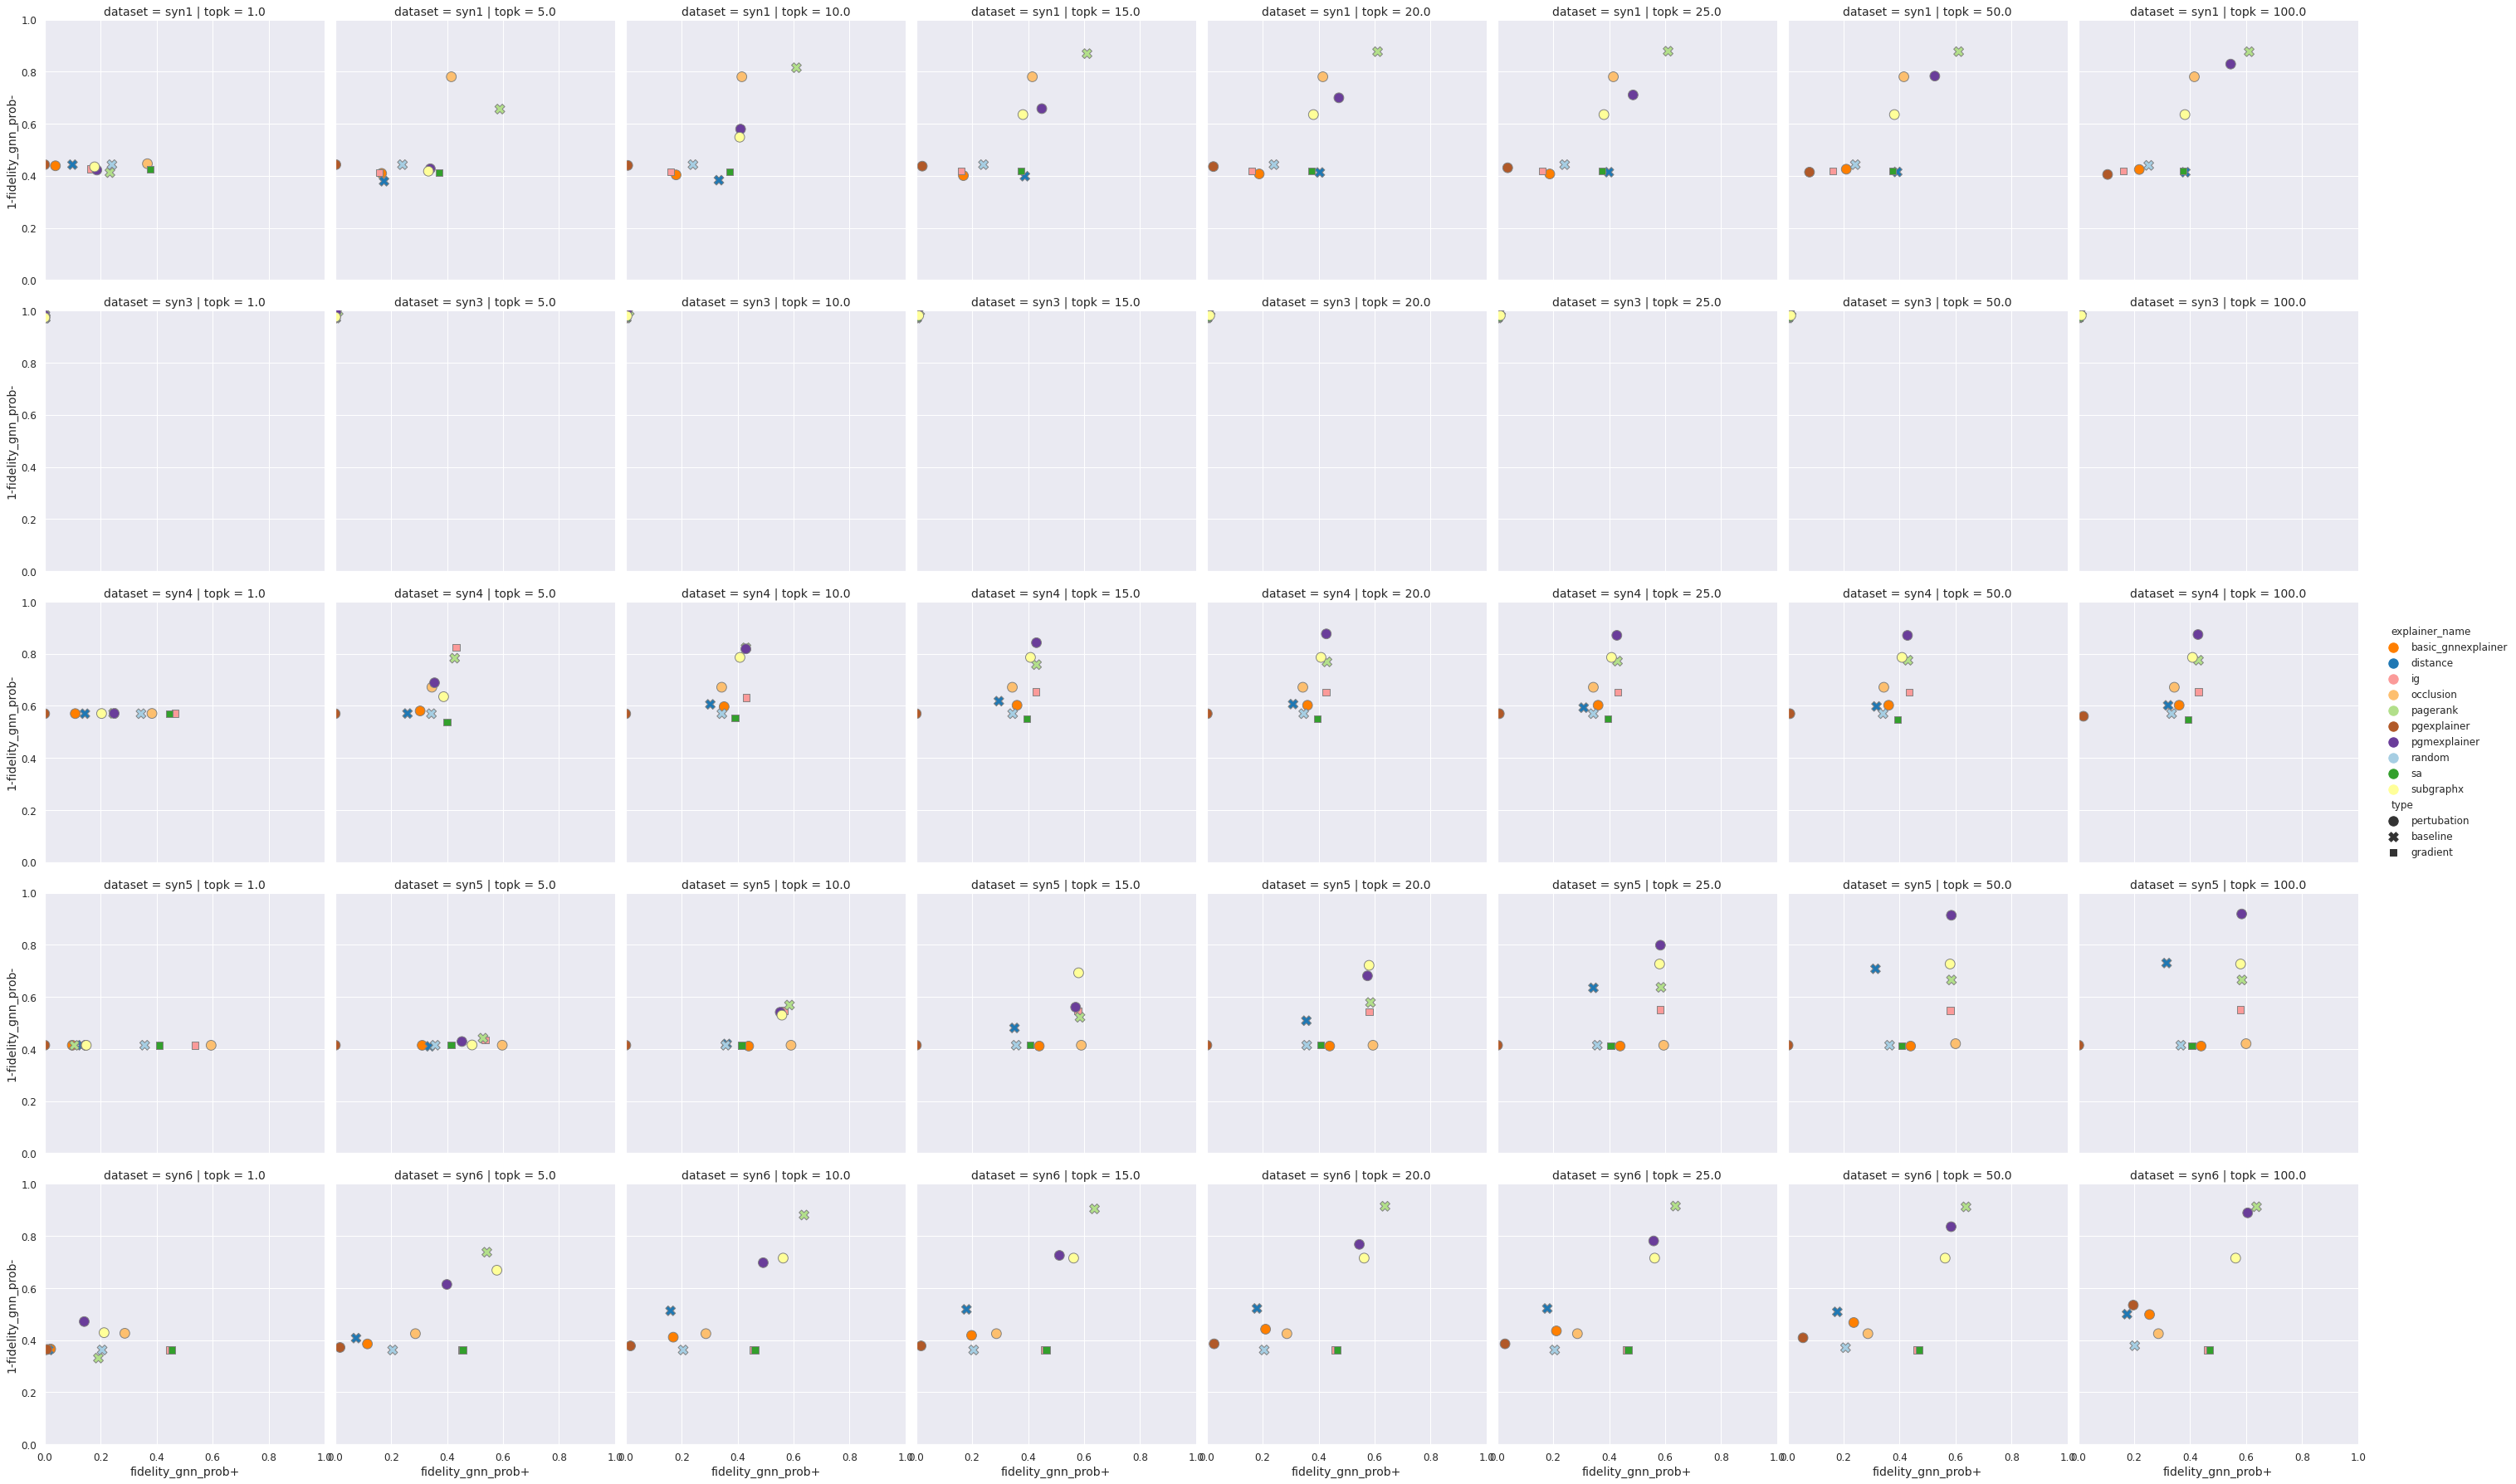

In [85]:
#### Fidelity Prob VS datasets & topk ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )
plt.xlim(0, 1)
plt.ylim(0, 1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

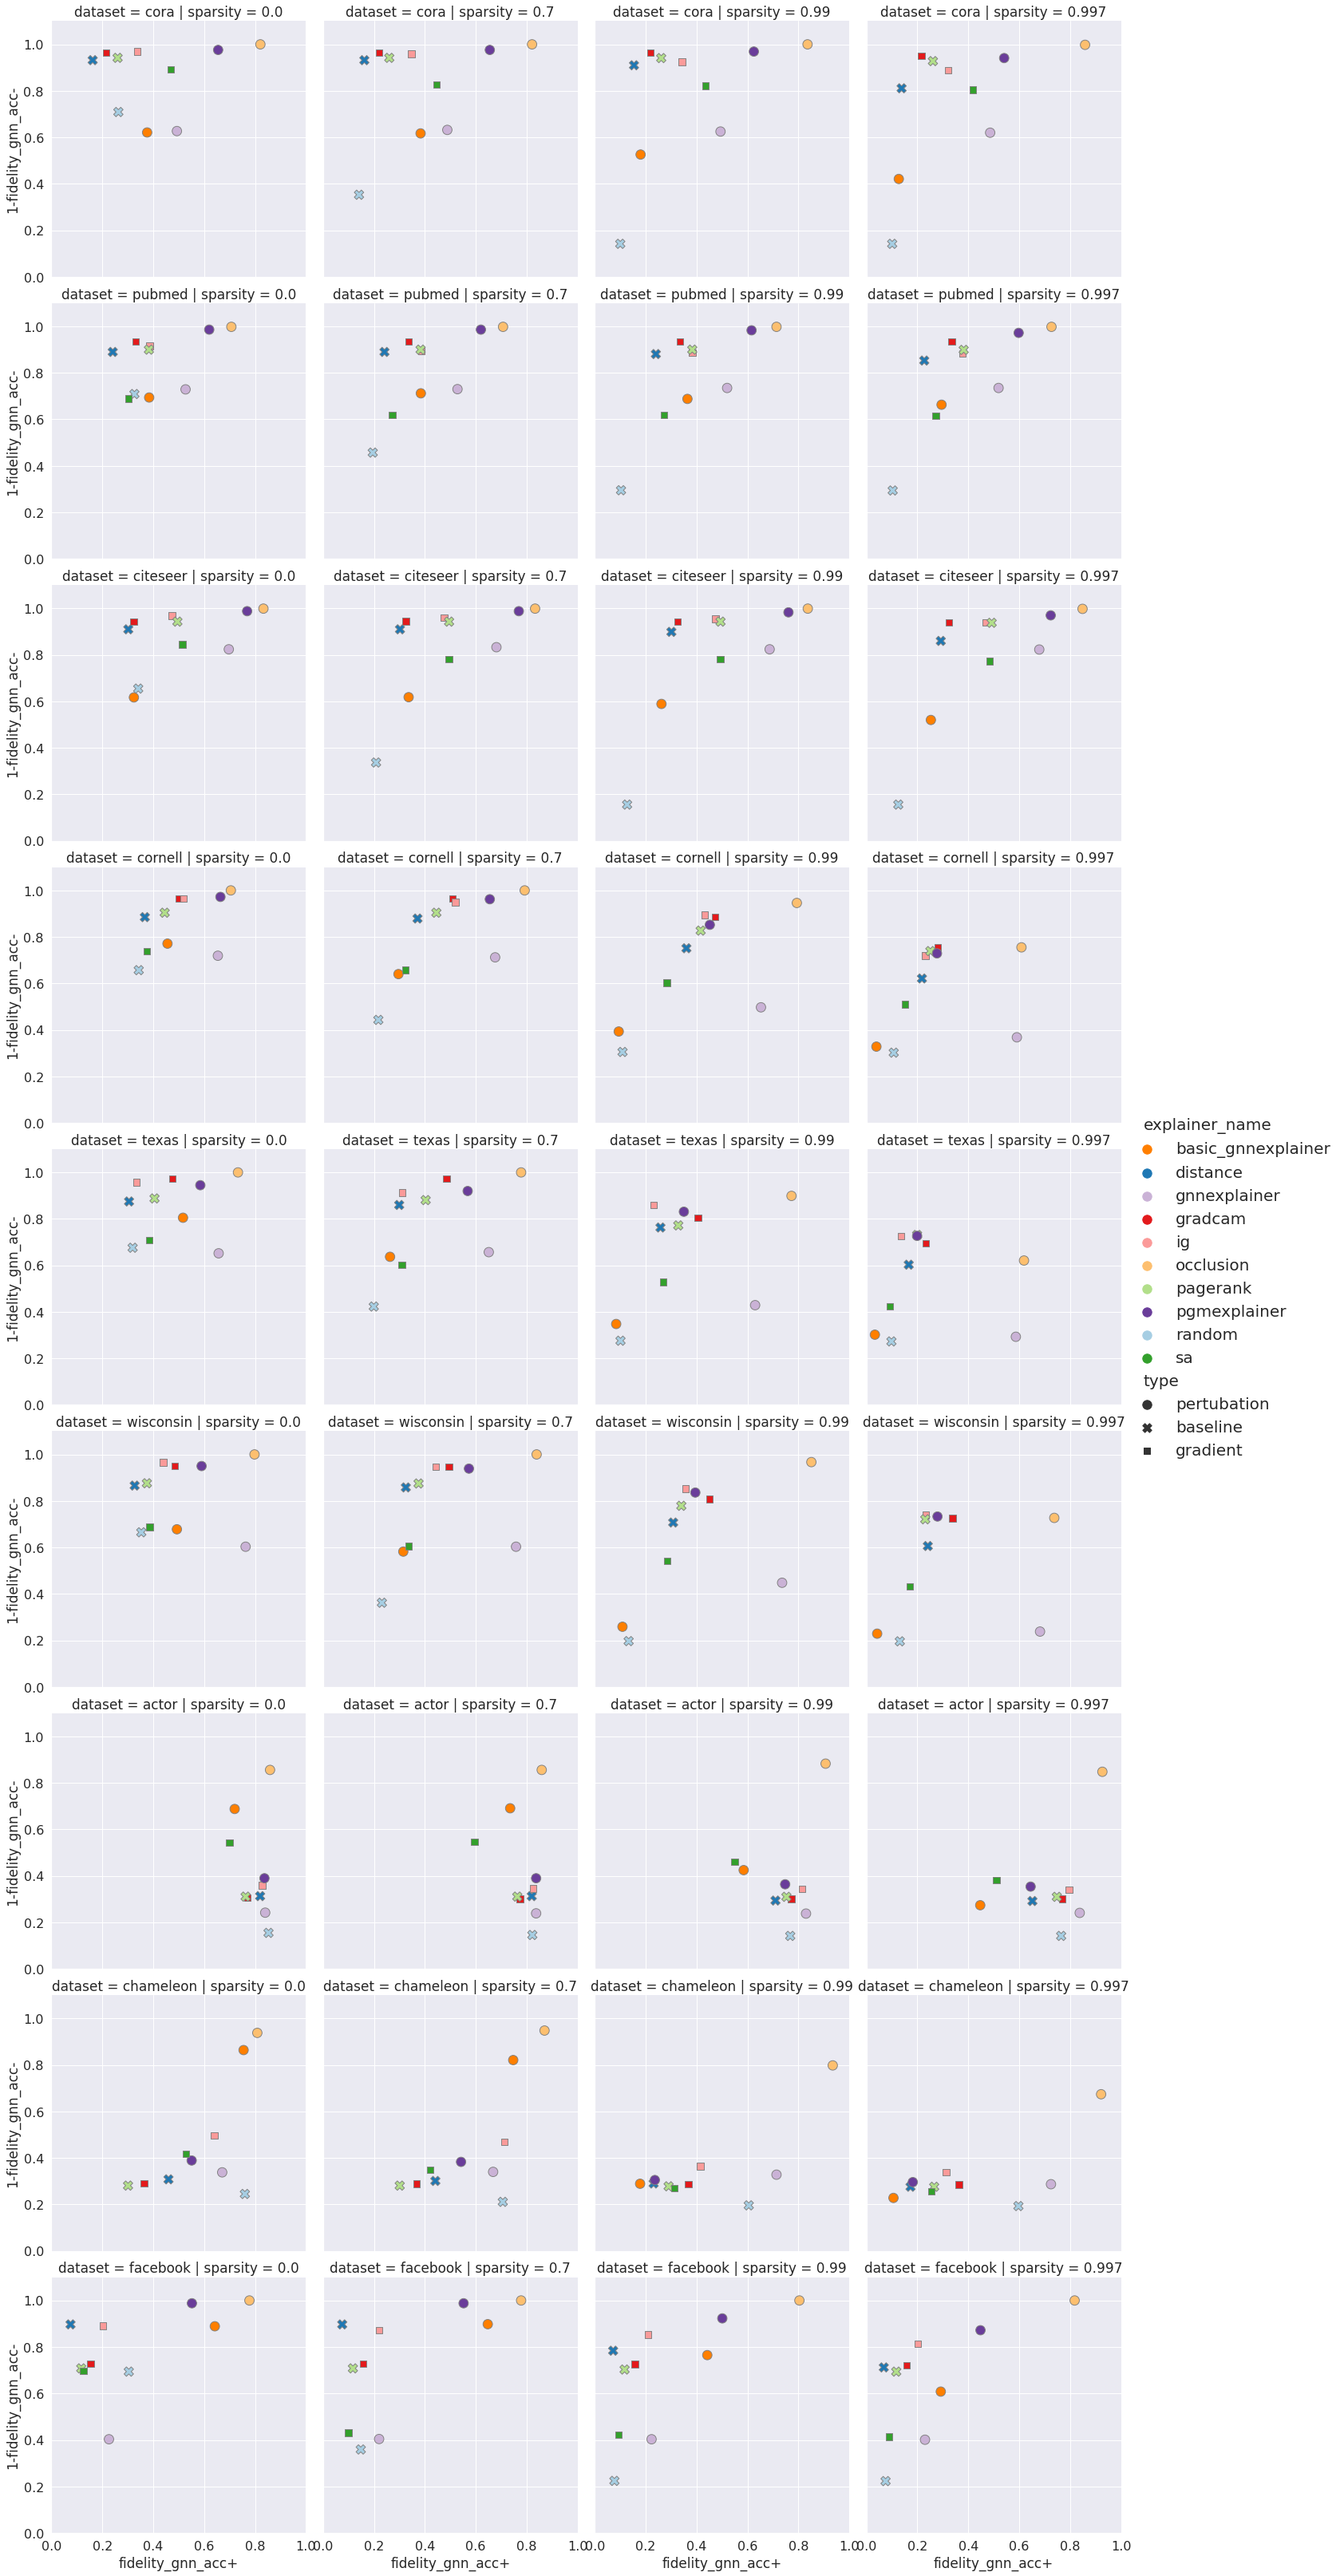

In [72]:
#### Fidelity Acc VS datasets & topk ####
g = sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="topk", row="dataset", 
        hue="explainer_name", palette=dict_color, s=140, style="type", alpha =1, edgecolor="grey"
    )

plt.xlim(0, 1)
plt.ylim(0, 1.1)
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [130] 

# Characterization Summary

In [105]:
topk = 5
names = ["_hard", "_soft", "_gnn_hard", "_gnn_soft"]
dfs = []
for name in names:
    df = eval("df"+name).groupby(by=['dataset', 'explainer_name', 'topk', 'true_label_as_target', 'hard_mask']).mean().reset_index()
    df_small = df[df.topk==topk]
    if name.startswith('_gnn'):
        df_small['charact_prob'] = df_small['charact_gnn_prob']
    res_init = df_small[['dataset', 'explainer_name', 'mask_size_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact_prob']]
    res_init.groupby(by=['dataset', 'explainer_name']).mean()
    #### Average characterization power among datasets for sparsity=0.7 ####
    df_char = pd.pivot_table(res_init, values='charact_prob', index=['explainer_name'], columns='dataset')
    df_char['charact_prob'] = df_char.mean(axis=1)
    df_char.sort_values(by=['charact_prob'])

    c = df_char.rename_axis(None, axis=1).reset_index()
    c = c[["explainer_name", "charact_prob"]]
    dfs.append(c)
    

    

/tmp/ipykernel_14264/3490956780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['charact_prob'] = df_small['charact_gnn_prob']


In [106]:
for i in range(4):
    locals()["c"+names[i]] = dfs[i]

In [107]:
s_phen = pd.merge(dfs[0], dfs[1], on="explainer_name", how="outer", suffixes=["_phen_hard", "_phen_soft"])
s_gnn = pd.merge(dfs[2], dfs[3], on="explainer_name", how="outer", suffixes=["_gnn_hard", "_gnn_soft"])
summary = pd.merge(s_phen, s_gnn, on="explainer_name", how="outer")
summary = summary.sort_values(by=['charact_prob_phen_soft', 'charact_prob_phen_hard'])
summary

explainer_name  charact_prob_phen_hard  charact_prob_phen_soft  \
5         pgexplainer                0.000171                0.003048   
1            distance                0.242618                0.150577   
0  basic_gnnexplainer                0.207823                0.186248   
7              random                0.233388                0.236722   
2                  ig                0.284909                0.295604   
8                  sa                0.312139                0.316095   
6        pgmexplainer                0.327292                0.324066   
9           subgraphx                0.371322                0.368393   
3           occlusion                0.364975                0.379788   
4            pagerank                0.435377                0.422168   

   charact_prob_gnn_hard  charact_prob_gnn_soft  
5               0.008581               0.007810  
1               0.281626               0.219051  
0               0.221283               0.234136  
7               0.278287               0.278288  
2               0.331916               0.336198  
8               0.332217               0.334523  
6               0.359494               0.355412  
9               0.384828               0.384804  
3               0.357603               0.366035  
4               0.464665               0.460073

In [97]:
summary.to_csv(f'/cluster/home/kamara/Explain/csv/node_classification/syn/summary/charact_summary_1expe_top{topk}.csv')